In [34]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import numpy
import numpy as np
# Import plot function
import matplotlib.pyplot as plt
# Import mosqito functions
#from mosqito.utils import load
from mosqito.sq_metrics import loudness_zwtv, sharpness_din_tv, roughness_dw, pr_ecma_tv, tnr_ecma_tv
from scipy.io import wavfile
from scipy.signal import resample
from maad.spl import pressure2leq, pressure2dBSPL
from maad.util import mean_dB
import librosa

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# To get inline plots (specific to Jupyter notebook)
#%matplotlib notebook

In [3]:
def load(file, wav_calib=None, mat_signal="", mat_fs="", ch=None):
    """Extract the signal and its time axis from .wav or .uff file,
    resample the signal to 48 kHz, and affects its sampling frequency
    and time signal values.

    Parameters
    ----------
    file : string
        string path to the signal file
    wav_calib : float, optional
        Wav file calibration factor [Pa/FS]. Level of the signal in Pa_peak
        corresponding to the full scale of the .wav file. If None, a
        calibration factor of 1 is considered. Default to None.
    mat_signal : string
        in case of a .mat file, name of the signal variable
    mat_fs : string
        in case of a .mat file, name of the sampling frequency variable

    Outputs
    -------
    signal : numpy.array
        time signal values
    fs : integer
        sampling frequency
    """

    # load the .wav file content
    if file[-3:] == "wav" or file[-3:] == "WAV":
        fs, signal = wavfile.read(file)

        # manage multichannel files
        if signal.ndim > 1:
            signal = signal[:, ch] # signal[:, 0] for first channel, signal[:, 1] for second ch

        # calibration factor for the signal to be in Pa
        if wav_calib is None:
            wav_calib = 1
            print("[Info] A calibration of 1 Pa/FS is considered")
        if isinstance(signal[0], np.int16):
            signal = wav_calib * signal / (2**15 - 1)
        elif isinstance(signal[0], np.int32):
            signal = wav_calib * signal / (2**31 - 1)
        elif isinstance(signal[0], np.float):
            signal = wav_calib * signal

    else:
        raise ValueError("""ERROR: only .wav .mat or .uff files are supported""")

    # resample to 48kHz to allow calculation
    if fs != 48000:
        signal = resample(signal, int(48000 * len(signal) / fs))
        fs = 48000

    return signal, fs


# Run iteration to find most appropiate gain that results in correct values



In [ ]:
def cost_function(current_Navg, current_Nmax, current_N05, desired_Navg, desired_Nmax, desired_N05):
    cost=( np.abs(np.abs(desired_Navg)-np.abs(current_Navg))
        +np.abs(np.abs(desired_Nmax)-np.abs(current_Nmax))
        +np.abs(np.abs(desired_N05)-np.abs(current_N05)))
    return cost

cost=100
gain=4.5
N_avg_true=ground_truth[0,1]
N_max_true=ground_truth[0,2]
N_05_true=ground_truth[0,3]
iteration=0
while cost>0.1 and iteration<10:
    print(iteration)
    # LOAD R0001_segment_binaural_44100_1.wav
    path = "../data/soundscapes/R0001_segment_binaural_44100_1.wav"
    sigL_test, fs = load(path, wav_calib=gain, ch=0) #L
    sigR_test, fs = load(path, wav_calib=gain, ch=1) #R

    # Calculate loudness
    #L
    N_l_test, N_spec_l_test, bark_axis_l_test, time_axis_l_test = loudness_zwtv(sigL_test, fs, field_type="free")
    N_avg_l_test=np.mean(N_l_test)
    N_max_l_test=np.max(N_l_test)
    N_05_l_test=np.percentile(N_l_test,95)
    print("loudness L calculated")
    #R
    N_r_test, N_spec_r_test, bark_axis_r_test, time_axis_r_test = loudness_zwtv(sigR_test, fs, field_type="free")
    N_avg_r_test=np.mean(N_r_test)
    N_max_r_test=np.max(N_r_test)
    N_05_r_test=np.percentile(N_r_test,95)
    print("loudness R calculated")

    N_avg_test=(N_avg_r_test+ N_avg_l_test)/2
    N_max_test=(N_max_r_test+ N_max_l_test)/2
    N_05_test=(N_05_r_test+N_05_l_test)/2

    cost=cost_function(N_avg_test, N_max_test, N_05_test, N_avg_true, N_max_true, N_05_true)
    
    print("Current Error ", cost)
    iteration=iteration+1
    gain=gain+0.1

print("Found! Gain is ", gain, " with error ", cost)


0
loudness L calculated
loudness R calculated
Current Error  1.2845083045811805
1
loudness L calculated
loudness R calculated
Current Error  0.7312674919934405
2
loudness L calculated
loudness R calculated
Current Error  0.8576058079887865
3


KeyboardInterrupt: 

# Array of data

In [19]:
data = [
    [0.759272, 14.8, 22.8, 17.0, 15.8, 15.2, 14.9, 14.7, 14.5, 14.3, 14.2, 14.0, 13.8, 13.6, 1.82, 1.99, 1.9],
    [0.759272, 15.0, 17.6, 16.1, 15.9, 15.6, 15.4, 15.2, 15.0, 14.9, 14.7, 14.5, 14.2, 14.0, 1.78, 1.93, 1.85],
    [1.363361, 18.0, 27.7, 25.1, 22.5, 20.2, 19.3, 18.7, 18.1, 17.6, 16.6, 14.2, 13.2, 12.9, 1.29, 1.59, 1.41],
    [1.363361, 16.3, 38.1, 31.0, 23.2, 19.0, 15.4, 14.6, 13.9, 13.5, 13.2, 12.9, 12.6, 12.4, 1.28, 1.76, 1.42],
    [1.114716, 8.85, 15.5, 11.5, 10.8, 10.3, 9.76, 9.22, 8.72, 7.95, 7.7, 7.48, 7.14, 6.76, 1.12, 1.6, 1.42],
    [1.114716, 7.57, 12.5, 10.4, 9.58, 8.53, 7.76, 7.41, 7.18, 7.04, 6.93, 6.81, 6.67, 6.56, 1.18, 1.41, 1.29],
    [1.041606, 13.1, 16.5, 14.5, 14.2, 13.8, 13.5, 13.3, 13.0, 12.8, 12.6, 12.4, 12.1, 11.9, 1.31, 1.53, 1.4],
    [1.041606, 13.4, 18.2, 15.9, 14.8, 14.1, 13.7, 13.4, 13.1, 12.9, 12.7, 12.5, 12.2, 12.0, 1.36, 1.58, 1.45],
    [1.181325, 6.8, 11.3, 7.52, 7.25, 7.05, 6.93, 6.83, 6.75, 6.68, 6.61, 6.52, 6.41, 6.33, 1.12, 1.55, 1.25],
    [1.181325, 8.05, 12.6, 9.91, 9.19, 8.42, 8.22, 8.06, 7.9, 7.77, 7.62, 7.44, 7.23, 7.07, 1.08, 1.39, 1.15],
    [1.167849, 8.47, 11.8, 9.91, 9.44, 9.04, 8.71, 8.44, 8.28, 8.16, 8.04, 7.9, 7.72, 7.59, 1.05, 1.47, 1.14],
    [1.167849, 12.7, 15.8, 14.2, 14.0, 13.6, 13.4, 13.2, 12.9, 12.7, 12.4, 11.9, 11.1, 10.6, 1.09, 1.32, 1.18],
    [1.117921, 6.9, 11.5, 8.61, 8.18, 7.67, 7.35, 7.06, 6.81, 6.58, 6.32, 6.09, 5.74, 5.5, 1.09, 1.72, 1.25],
    [1.117921, 6.61, 13.3, 8.65, 7.85, 7.27, 6.91, 6.63, 6.4, 6.21, 6.03, 5.85, 5.6, 5.42, 1.1, 1.67, 1.31],
    [1.463234, 9.05, 10.2, 9.58, 9.47, 9.32, 9.21, 9.13, 9.05, 8.97, 8.89, 8.8, 8.67, 8.56, 882, 955, 921],
    [1.463234, 9.02, 11.4, 9.63, 9.46, 9.28, 9.17, 9.08, 9.0, 8.92, 8.83, 8.74, 8.61, 8.51, 0.89, 1.29, 933],
    [0.987588, 14.8, 17.0, 15.5, 15.4, 15.1, 15.0, 14.9, 14.8, 14.7, 14.5, 14.4, 14.3, 14.1, 1.3, 1.45, 1.35],
    [0.987588, 14.9, 19.0, 15.7, 15.5, 15.3, 15.2, 15.1, 14.9, 14.8, 14.7, 14.5, 14.4, 14.2, 1.29, 1.62, 1.34],
    [1.028043, 16.6, 28.6, 21.7, 19.9, 18.4, 17.4, 16.6, 16.0, 15.5, 15.0, 14.5, 13.7, 13.3, 1.29, 2.07, 1.76],
    [1.028043, 17.0, 26.6, 20.4, 19.3, 18.3, 17.8, 17.3, 16.8, 16.4, 16.0, 15.4, 14.8, 14.2, 1.29, 1.95, 1.64]
]#    gain     Navg  Nmax  N05   N10   N20   N30   N40    N50  N60   N70   N80   N90   N94   Savg  Smax  S05


ground_truth=np.array(data)

# Comparing different non-augmented soundscapes calculation VS ground-truth - loudness

Load signals

In [20]:

# R0001_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0001_segment_binaural_44100_1.wav"
sigL_0001_1, fs = load(path, wav_calib=4.6*ground_truth[0,0]/ground_truth[0,0], ch=0) #L
sigR_0001_1, fs = load(path, wav_calib=4.6*ground_truth[0,0]/ground_truth[0,0], ch=1) #R

# R0001_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0001_segment_binaural_44100_2.wav"
sigL_0001_2, fs = load(path, wav_calib=4.6*ground_truth[1,0]/ground_truth[0,0], ch=0) #L
sigR_0001_2, fs = load(path, wav_calib=4.6*ground_truth[1,0]/ground_truth[0,0], ch=1) #R

# R0002_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0002_segment_binaural_44100_1.wav"
sigL_0002_1, fs = load(path, wav_calib=4.6*ground_truth[2,0]/ground_truth[0,0], ch=0) #L
sigR_0002_1, fs = load(path, wav_calib=4.6*ground_truth[2,0]/ground_truth[0,0], ch=1) #R

# R0002_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0002_segment_binaural_44100_2.wav"
sigL_0002_2, fs = load(path, wav_calib=4.6*ground_truth[3,0]/ground_truth[0,0], ch=0) #L
sigR_0002_2, fs = load(path, wav_calib=4.6*ground_truth[3,0]/ground_truth[0,0], ch=1) #R

# R0003_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0003_segment_binaural_44100_1.wav"
sigL_0003_1, fs = load(path, wav_calib=4.6*ground_truth[4,0]/ground_truth[0,0], ch=0) #L
sigR_0003_1, fs = load(path, wav_calib=4.6*ground_truth[4,0]/ground_truth[0,0], ch=1) #R

# R0003_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0003_segment_binaural_44100_2.wav"
sigL_0003_2, fs = load(path, wav_calib=4.6*ground_truth[5,0]/ground_truth[0,0], ch=0) #L
sigR_0003_2, fs = load(path, wav_calib=4.6*ground_truth[5,0]/ground_truth[0,0], ch=1) #R

# R0004_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0004_segment_binaural_44100_1.wav"
sigL_0004_1, fs = load(path, wav_calib=4.6*ground_truth[6,0]/ground_truth[0,0], ch=0) #L
sigR_0004_1, fs = load(path, wav_calib=4.6*ground_truth[6,0]/ground_truth[0,0], ch=1) #R

# R0004_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0004_segment_binaural_44100_2.wav"
sigL_0004_2, fs = load(path, wav_calib=4.6*ground_truth[7,0]/ground_truth[0,0], ch=0) #L
sigR_0004_2, fs = load(path, wav_calib=4.6*ground_truth[7,0]/ground_truth[0,0], ch=1) #R

# R0005_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0005_segment_binaural_44100_1.wav"
sigL_0005_1, fs = load(path, wav_calib=4.6*ground_truth[8,0]/ground_truth[0,0], ch=0) #L
sigR_0005_1, fs = load(path, wav_calib=4.6*ground_truth[8,0]/ground_truth[0,0], ch=1) #R

# R0005_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0005_segment_binaural_44100_2.wav"
sigL_0005_2, fs = load(path, wav_calib=4.6*ground_truth[9,0]/ground_truth[0,0], ch=0) #L
sigR_0005_2, fs = load(path, wav_calib=4.6*ground_truth[9,0]/ground_truth[0,0], ch=1) #R

# R0006_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0006_segment_binaural_44100_1.wav"
sigL_0006_1, fs = load(path, wav_calib=4.6*ground_truth[10,0]/ground_truth[0,0], ch=0) #L
sigR_0006_1, fs = load(path, wav_calib=4.6*ground_truth[10,0]/ground_truth[0,0], ch=1) #R

# R0006_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0006_segment_binaural_44100_2.wav"
sigL_0006_2, fs = load(path, wav_calib=4.6*ground_truth[11,0]/ground_truth[0,0], ch=0) #L
sigR_0006_2, fs = load(path, wav_calib=4.6*ground_truth[11,0]/ground_truth[0,0], ch=1) #R

# R0007_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0007_segment_binaural_44100_1.wav"
sigL_0007_1, fs = load(path, wav_calib=4.6*ground_truth[12,0]/ground_truth[0,0], ch=0) #L
sigR_0007_1, fs = load(path, wav_calib=4.6*ground_truth[12,0]/ground_truth[0,0], ch=1) #R

# R0007_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0007_segment_binaural_44100_2.wav"
sigL_0007_2, fs = load(path, wav_calib=4.6*ground_truth[13,0]/ground_truth[0,0], ch=0) #L
sigR_0007_2, fs = load(path, wav_calib=4.6*ground_truth[13,0]/ground_truth[0,0], ch=1) #R

# R0008_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0008_segment_binaural_44100_1.wav"
sigL_0008_1, fs = load(path, wav_calib=4.6*ground_truth[14,0]/ground_truth[0,0], ch=0) #L
sigR_0008_1, fs = load(path, wav_calib=4.6*ground_truth[14,0]/ground_truth[0,0], ch=1) #R

# R0008_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0008_segment_binaural_44100_2.wav"
sigL_0008_2, fs = load(path, wav_calib=4.6*ground_truth[15,0]/ground_truth[0,0], ch=0) #L
sigR_0008_2, fs = load(path, wav_calib=4.6*ground_truth[15,0]/ground_truth[0,0], ch=1) #R

# R0009_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0009_segment_binaural_44100_1.wav"
sigL_0009_1, fs = load(path, wav_calib=4.6*ground_truth[16,0]/ground_truth[0,0], ch=0) #L
sigR_0009_1, fs = load(path, wav_calib=4.6*ground_truth[16,0]/ground_truth[0,0], ch=1) #R

# R0009_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0009_segment_binaural_44100_2.wav"
sigL_0009_2, fs = load(path, wav_calib=4.6*ground_truth[17,0]/ground_truth[0,0], ch=0) #L
sigR_0009_2, fs = load(path, wav_calib=4.6*ground_truth[17,0]/ground_truth[0,0], ch=1) #R

# R00010_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0010_segment_binaural_44100_1.wav"
sigL_0010_1, fs = load(path, wav_calib=4.6*ground_truth[18,0]/ground_truth[0,0], ch=0) #L
sigR_0010_1, fs = load(path, wav_calib=4.6*ground_truth[18,0]/ground_truth[0,0], ch=1) #R

# R0010_segment_binaural_44100_2.wav
path = "../data/soundscapes/R0010_segment_binaural_44100_2.wav"
sigL_0010_2, fs = load(path, wav_calib=4.6*ground_truth[19,0]/ground_truth[0,0], ch=0) #L
sigR_0010_2, fs = load(path, wav_calib=4.6*ground_truth[19,0]/ground_truth[0,0], ch=1) #R

Calculate loudness

In [69]:
# R0001_segment_binaural_44100_1.wav
#L
N_l_0001_1, N_spec_l_0001_1, bark_axis_l_0001_1, time_axis_l_0001_1 = loudness_zwtv(sigL_0001_1, fs, field_type="free")
N_avg_l_0001_1=np.mean(N_l_0001_1)
N_max_l_0001_1=np.max(N_l_0001_1)
N_05_l_0001_1=np.percentile(N_l_0001_1,95)
#R
N_r_0001_1, N_spec_r_0001_1, bark_axis_r_0001_1, time_axis_r_0001_1 = loudness_zwtv(sigR_0001_1, fs, field_type="free")
N_avg_r_0001_1=np.mean(N_r_0001_1)
N_max_r_0001_1=np.max(N_r_0001_1)
N_05_r_0001_1=np.percentile(N_r_0001_1,95)

# R0001_segment_binaural_44100_2.wav
#L
N_l_0001_2, N_spec_l_0001_2, bark_axis_l_0001_2, time_axis_l_0001_2 = loudness_zwtv(sigL_0001_2, fs, field_type="free")
N_avg_l_0001_2=np.mean(N_l_0001_2)
N_max_l_0001_2=np.max(N_l_0001_2)
N_05_l_0001_2=np.percentile(N_l_0001_2,95)
#R
N_r_0001_2, N_spec_r_0001_2, bark_axis_r_0001_2, time_axis_r_0001_2 = loudness_zwtv(sigR_0001_2, fs, field_type="free")
N_avg_r_0001_2=np.mean(N_r_0001_2)
N_max_r_0001_2=np.max(N_r_0001_2)
N_05_r_0001_2=np.percentile(N_r_0001_2,95)

# R0002_segment_binaural_44100_1.wav
#L
N_l_0002_1, N_spec_l_0002_1, bark_axis_l_0002_1, time_axis_l_0002_1 = loudness_zwtv(sigL_0002_1, fs, field_type="free")
N_avg_l_0002_1=np.mean(N_l_0002_1)
N_max_l_0002_1=np.max(N_l_0002_1)
N_05_l_0002_1=np.percentile(N_l_0002_1,95)
#R
N_r_0002_1, N_spec_r_0002_1, bark_axis_r_0002_1, time_axis_r_0002_1 = loudness_zwtv(sigR_0002_1, fs, field_type="free")
N_avg_r_0002_1=np.mean(N_r_0002_1)
N_max_r_0002_1=np.max(N_r_0002_1)
N_05_r_0002_1=np.percentile(N_r_0002_1,95)

# R0002_segment_binaural_44100_2.wav
#L
N_l_0002_2, N_spec_l_0002_2, bark_axis_l_0002_2, time_axis_l_0002_2 = loudness_zwtv(sigL_0002_2, fs, field_type="free")
N_avg_l_0002_2=np.mean(N_l_0002_2)
N_max_l_0002_2=np.max(N_l_0002_2)
N_05_l_0002_2=np.percentile(N_l_0002_2,95)
#R
N_r_0002_2, N_spec_r_0002_2, bark_axis_r_0002_2, time_axis_r_0002_2 = loudness_zwtv(sigR_0002_2, fs, field_type="free")
N_avg_r_0002_2=np.mean(N_r_0002_2)
N_max_r_0002_2=np.max(N_r_0002_2)
N_05_r_0002_2=np.percentile(N_r_0002_2,95)

# R0003_segment_binaural_44100_1.wav
#L
N_l_0003_1, N_spec_l_0003_1, bark_axis_l_0003_1, time_axis_l_0003_1 = loudness_zwtv(sigL_0003_1, fs, field_type="free")
N_avg_l_0003_1=np.mean(N_l_0003_1)
N_max_l_0003_1=np.max(N_l_0003_1)
N_05_l_0003_1=np.percentile(N_l_0003_1,95)
#R
N_r_0003_1, N_spec_r_0003_1, bark_axis_r_0003_1, time_axis_r_0003_1 = loudness_zwtv(sigR_0003_1, fs, field_type="free")
N_avg_r_0003_1=np.mean(N_r_0003_1)
N_max_r_0003_1=np.max(N_r_0003_1)
N_05_r_0003_1=np.percentile(N_r_0003_1,95)

# R0003_segment_binaural_44100_2.wav
#L
N_l_0003_2, N_spec_l_0003_2, bark_axis_l_0003_2, time_axis_l_0003_2 = loudness_zwtv(sigL_0003_2, fs, field_type="free")
N_avg_l_0003_2=np.mean(N_l_0003_2)
N_max_l_0003_2=np.max(N_l_0003_2)
N_05_l_0003_2=np.percentile(N_l_0003_2,95)
#R
N_r_0003_2, N_spec_r_0003_2, bark_axis_r_0003_2, time_axis_r_0003_2 = loudness_zwtv(sigR_0003_2, fs, field_type="free")
N_avg_r_0003_2=np.mean(N_r_0003_2)
N_max_r_0003_2=np.max(N_r_0003_2)
N_05_r_0003_2=np.percentile(N_r_0003_2,95)

# R0004_segment_binaural_44100_1.wav
#L
N_l_0004_1, N_spec_l_0004_1, bark_axis_l_0004_1, time_axis_l_0004_1 = loudness_zwtv(sigL_0004_1, fs, field_type="free")
N_avg_l_0004_1=np.mean(N_l_0004_1)
N_max_l_0004_1=np.max(N_l_0004_1)
N_05_l_0004_1=np.percentile(N_l_0004_1,95)
#R
N_r_0004_1, N_spec_r_0004_1, bark_axis_r_0004_1, time_axis_r_0004_1 = loudness_zwtv(sigR_0004_1, fs, field_type="free")
N_avg_r_0004_1=np.mean(N_r_0004_1)
N_max_r_0004_1=np.max(N_r_0004_1)
N_05_r_0004_1=np.percentile(N_r_0004_1,95)

# R0004_segment_binaural_44100_2.wav
#L
N_l_0004_2, N_spec_l_0004_2, bark_axis_l_0004_2, time_axis_l_0004_2 = loudness_zwtv(sigL_0004_2, fs, field_type="free")
N_avg_l_0004_2=np.mean(N_l_0004_2)
N_max_l_0004_2=np.max(N_l_0004_2)
N_05_l_0004_2=np.percentile(N_l_0004_2,95)
#R
N_r_0004_2, N_spec_r_0004_2, bark_axis_r_0004_2, time_axis_r_0004_2 = loudness_zwtv(sigR_0004_2, fs, field_type="free")
N_avg_r_0004_2=np.mean(N_r_0004_2)
N_max_r_0004_2=np.max(N_r_0004_2)
N_05_r_0004_2=np.percentile(N_r_0004_2,95)

# R0005_segment_binaural_44100_1.wav
#L
N_l_0005_1, N_spec_l_0005_1, bark_axis_l_0005_1, time_axis_l_0005_1 = loudness_zwtv(sigL_0005_1, fs, field_type="free")
N_avg_l_0005_1=np.mean(N_l_0005_1)
N_max_l_0005_1=np.max(N_l_0005_1)
N_05_l_0005_1=np.percentile(N_l_0005_1,95)
#R
N_r_0005_1, N_spec_r_0005_1, bark_axis_r_0005_1, time_axis_r_0005_1 = loudness_zwtv(sigR_0005_1, fs, field_type="free")
N_avg_r_0005_1=np.mean(N_r_0005_1)
N_max_r_0005_1=np.max(N_r_0005_1)
N_05_r_0005_1=np.percentile(N_r_0005_1,95)

# R0005_segment_binaural_44100_2.wav
#L
N_l_0005_2, N_spec_l_0005_2, bark_axis_l_0005_2, time_axis_l_0005_2 = loudness_zwtv(sigL_0005_2, fs, field_type="free")
N_avg_l_0005_2=np.mean(N_l_0005_2)
N_max_l_0005_2=np.max(N_l_0005_2)
N_05_l_0005_2=np.percentile(N_l_0005_2,95)
#R
N_r_0005_2, N_spec_r_0005_2, bark_axis_r_0005_2, time_axis_r_0005_2 = loudness_zwtv(sigR_0005_2, fs, field_type="free")
N_avg_r_0005_2=np.mean(N_r_0005_2)
N_max_r_0005_2=np.max(N_r_0005_2)
N_05_r_0005_2=np.percentile(N_r_0005_2,95)

# R0006_segment_binaural_44100_1.wav
#L
N_l_0006_1, N_spec_l_0006_1, bark_axis_l_0006_1, time_axis_l_0006_1 = loudness_zwtv(sigL_0006_1, fs, field_type="free")
N_avg_l_0006_1=np.mean(N_l_0006_1)
N_max_l_0006_1=np.max(N_l_0006_1)
N_05_l_0006_1=np.percentile(N_l_0006_1,95)
#R
N_r_0006_1, N_spec_r_0006_1, bark_axis_r_0006_1, time_axis_r_0006_1 = loudness_zwtv(sigR_0006_1, fs, field_type="free")
N_avg_r_0006_1=np.mean(N_r_0006_1)
N_max_r_0006_1=np.max(N_r_0006_1)
N_05_r_0006_1=np.percentile(N_r_0006_1,95)

# R0006_segment_binaural_44100_2.wav
#L
N_l_0006_2, N_spec_l_0006_2, bark_axis_l_0006_2, time_axis_l_0006_2 = loudness_zwtv(sigL_0006_2, fs, field_type="free")
N_avg_l_0006_2=np.mean(N_l_0006_2)
N_max_l_0006_2=np.max(N_l_0006_2)
N_05_l_0006_2=np.percentile(N_l_0006_2,95)
#R
N_r_0006_2, N_spec_r_0006_2, bark_axis_r_0006_2, time_axis_r_0006_2 = loudness_zwtv(sigR_0006_2, fs, field_type="free")
N_avg_r_0006_2=np.mean(N_r_0006_2)
N_max_r_0006_2=np.max(N_r_0006_2)
N_05_r_0006_2=np.percentile(N_r_0006_2,95)

# R0007_segment_binaural_44100_1.wav
#L
N_l_0007_1, N_spec_l_0007_1, bark_axis_l_0007_1, time_axis_l_0007_1 = loudness_zwtv(sigL_0007_1, fs, field_type="free")
N_avg_l_0007_1=np.mean(N_l_0007_1)
N_max_l_0007_1=np.max(N_l_0007_1)
N_05_l_0007_1=np.percentile(N_l_0007_1,95)
#R
N_r_0007_1, N_spec_r_0007_1, bark_axis_r_0007_1, time_axis_r_0007_1 = loudness_zwtv(sigR_0007_1, fs, field_type="free")
N_avg_r_0007_1=np.mean(N_r_0007_1)
N_max_r_0007_1=np.max(N_r_0007_1)
N_05_r_0007_1=np.percentile(N_r_0007_1,95)

# R0007_segment_binaural_44100_2.wav
#L
N_l_0007_2, N_spec_l_0007_2, bark_axis_l_0007_2, time_axis_l_0007_2 = loudness_zwtv(sigL_0007_2, fs, field_type="free")
N_avg_l_0007_2=np.mean(N_l_0007_2)
N_max_l_0007_2=np.max(N_l_0007_2)
N_05_l_0007_2=np.percentile(N_l_0007_2,95)
#R
N_r_0007_2, N_spec_r_0007_2, bark_axis_r_0007_2, time_axis_r_0007_2 = loudness_zwtv(sigR_0007_2, fs, field_type="free")
N_avg_r_0007_2=np.mean(N_r_0007_2)
N_max_r_0007_2=np.max(N_r_0007_2)
N_05_r_0007_2=np.percentile(N_r_0007_2,95)

# R0008_segment_binaural_44100_1.wav
#L
N_l_0008_1, N_spec_l_0008_1, bark_axis_l_0008_1, time_axis_l_0008_1 = loudness_zwtv(sigL_0008_1, fs, field_type="free")
N_avg_l_0008_1=np.mean(N_l_0008_1)
N_max_l_0008_1=np.max(N_l_0008_1)
N_05_l_0008_1=np.percentile(N_l_0008_1,95)
#R
N_r_0008_1, N_spec_r_0008_1, bark_axis_r_0008_1, time_axis_r_0008_1 = loudness_zwtv(sigR_0008_1, fs, field_type="free")
N_avg_r_0008_1=np.mean(N_r_0008_1)
N_max_r_0008_1=np.max(N_r_0008_1)
N_05_r_0008_1=np.percentile(N_r_0008_1,95)

# R0008_segment_binaural_44100_2.wav
#L
N_l_0008_2, N_spec_l_0008_2, bark_axis_l_0008_2, time_axis_l_0008_2 = loudness_zwtv(sigL_0008_2, fs, field_type="free")
N_avg_l_0008_2=np.mean(N_l_0008_2)
N_max_l_0008_2=np.max(N_l_0008_2)
N_05_l_0008_2=np.percentile(N_l_0008_2,95)
#R
N_r_0008_2, N_spec_r_0008_2, bark_axis_r_0008_2, time_axis_r_0008_2 = loudness_zwtv(sigR_0008_2, fs, field_type="free")
N_avg_r_0008_2=np.mean(N_r_0008_2)
N_max_r_0008_2=np.max(N_r_0008_2)
N_05_r_0008_2=np.percentile(N_r_0008_2,95)

# R0009_segment_binaural_44100_1.wav
#L
N_l_0009_1, N_spec_l_0009_1, bark_axis_l_0009_1, time_axis_l_0009_1 = loudness_zwtv(sigL_0009_1, fs, field_type="free")
N_avg_l_0009_1=np.mean(N_l_0009_1)
N_max_l_0009_1=np.max(N_l_0009_1)
N_05_l_0009_1=np.percentile(N_l_0009_1,95)
#R
N_r_0009_1, N_spec_r_0009_1, bark_axis_r_0009_1, time_axis_r_0009_1 = loudness_zwtv(sigR_0009_1, fs, field_type="free")
N_avg_r_0009_1=np.mean(N_r_0009_1)
N_max_r_0009_1=np.max(N_r_0009_1)
N_05_r_0009_1=np.percentile(N_r_0009_1,95)

# R0009_segment_binaural_44100_2.wav
#L
N_l_0009_2, N_spec_l_0009_2, bark_axis_l_0009_2, time_axis_l_0009_2 = loudness_zwtv(sigL_0009_2, fs, field_type="free")
N_avg_l_0009_2=np.mean(N_l_0009_2)
N_max_l_0009_2=np.max(N_l_0009_2)
N_05_l_0009_2=np.percentile(N_l_0009_2,95)
#R
N_r_0009_2, N_spec_r_0009_2, bark_axis_r_0009_2, time_axis_r_0009_2 = loudness_zwtv(sigR_0009_2, fs, field_type="free")
N_avg_r_0009_2=np.mean(N_r_0009_2)
N_max_r_0009_2=np.max(N_r_0009_2)
N_05_r_0009_2=np.percentile(N_r_0009_2,95)

# R00010_segment_binaural_44100_1.wav
#L
N_l_0010_1, N_spec_l_0010_1, bark_axis_l_0010_1, time_axis_l_0010_1 = loudness_zwtv(sigL_0010_1, fs, field_type="free")
N_avg_l_0010_1=np.mean(N_l_0010_1)
N_max_l_0010_1=np.max(N_l_0010_1)
N_05_l_0010_1=np.percentile(N_l_0010_1,95)
#R
N_r_0010_1, N_spec_r_0010_1, bark_axis_r_0010_1, time_axis_r_0010_1 = loudness_zwtv(sigR_0010_1, fs, field_type="free")
N_avg_r_0010_1=np.mean(N_r_0010_1)
N_max_r_0010_1=np.max(N_r_0010_1)
N_05_r_0010_1=np.percentile(N_r_0010_1,95)

# R0010_segment_binaural_44100_2.wav
#L
N_l_0010_2, N_spec_l_0010_2, bark_axis_l_0010_2, time_axis_l_0010_2 = loudness_zwtv(sigL_0010_2, fs, field_type="free")
N_avg_l_0010_2=np.mean(N_l_0010_2)
N_max_l_0010_2=np.max(N_l_0010_2)
N_05_l_0010_2=np.percentile(N_l_0010_2,95)
#R
N_r_0010_2, N_spec_r_0010_2, bark_axis_r_0010_2, time_axis_r_0010_2 = loudness_zwtv(sigR_0010_2, fs, field_type="free")
N_avg_r_0010_2=np.mean(N_r_0010_2)
N_max_r_0010_2=np.max(N_r_0010_2)
N_05_r_0010_2=np.percentile(N_r_0010_2,95)

In [70]:
N_avg_l=np.array([N_avg_l_0001_1,N_avg_l_0001_2
                  ,N_avg_l_0002_1, N_avg_l_0002_2,
                  N_avg_l_0003_1, N_avg_l_0003_2,
                  N_avg_l_0004_1, N_avg_l_0004_2,
                  N_avg_l_0005_1, N_avg_l_0005_2,
                  N_avg_l_0006_1, N_avg_l_0006_2,
                  N_avg_l_0007_1, N_avg_l_0007_2,
                  N_avg_l_0008_1, N_avg_l_0008_2,
                  N_avg_l_0009_1, N_avg_l_0009_2,
                  N_avg_l_0010_1, N_avg_l_0010_2,
                  ])

N_avg_r=np.array([N_avg_r_0001_1,N_avg_r_0001_2
                  ,N_avg_r_0002_1, N_avg_r_0002_2,
                  N_avg_r_0003_1, N_avg_r_0003_2,
                  N_avg_r_0004_1, N_avg_r_0004_2,
                  N_avg_r_0005_1, N_avg_r_0005_2,
                  N_avg_r_0006_1, N_avg_r_0006_2,
                  N_avg_r_0007_1, N_avg_r_0007_2,
                  N_avg_r_0008_1, N_avg_r_0008_2,
                  N_avg_r_0009_1, N_avg_r_0009_2,
                  N_avg_r_0010_1, N_avg_r_0010_2,
                  ])

N_max_l=np.array([ N_max_l_0001_1, N_max_l_0001_2,
                  N_max_l_0002_1, N_max_l_0002_2,
                  N_max_l_0003_1, N_max_l_0003_2,
                  N_max_l_0004_1, N_max_l_0004_2,
                  N_max_l_0005_1, N_max_l_0005_2,
                  N_max_l_0006_1, N_max_l_0006_2,
                  N_max_l_0007_1, N_max_l_0007_2,
                  N_max_l_0008_1, N_max_l_0008_2,
                  N_max_l_0009_1, N_max_l_0009_2,
                  N_max_l_0010_1, N_max_l_0010_2,
                ])
N_max_r=np.array([ N_max_r_0001_1, N_max_r_0001_2,
                  N_max_r_0002_1, N_max_r_0002_2,
                  N_max_r_0003_1, N_max_r_0003_2,
                  N_max_r_0004_1, N_max_r_0004_2,
                  N_max_r_0005_1, N_max_r_0005_2,
                  N_max_r_0006_1, N_max_r_0006_2,
                  N_max_r_0007_1, N_max_r_0007_2,
                  N_max_r_0008_1, N_max_r_0008_2,
                  N_max_r_0009_1, N_max_r_0009_2,
                  N_max_r_0010_1, N_max_r_0010_2,
                ])

N_05_l=np.array([
    N_05_l_0001_1, N_05_l_0001_2,
    N_05_l_0002_1, N_05_l_0002_2,
    N_05_l_0003_1, N_05_l_0003_2,
    N_05_l_0004_1, N_05_l_0004_2,
    N_05_l_0005_1, N_05_l_0005_2,
    N_05_l_0006_1, N_05_l_0006_2,
    N_05_l_0007_1, N_05_l_0007_2,
    N_05_l_0008_1, N_05_l_0008_2,
    N_05_l_0009_1, N_05_l_0009_2,
    N_05_l_0010_1, N_05_l_0010_2,
])

N_05_r=np.array([
    N_05_r_0001_1, N_05_r_0001_2,
    N_05_r_0002_1, N_05_r_0002_2,
    N_05_r_0003_1, N_05_r_0003_2,
    N_05_r_0004_1, N_05_r_0004_2,
    N_05_r_0005_1, N_05_r_0005_2,
    N_05_r_0006_1, N_05_r_0006_2,
    N_05_r_0007_1, N_05_r_0007_2,
    N_05_r_0008_1, N_05_r_0008_2,
    N_05_r_0009_1, N_05_r_0009_2,
    N_05_r_0010_1, N_05_r_0010_2,
])

N_avg=(N_avg_l+N_avg_r)/2
N_max=(N_max_l+N_max_r)/2
N_05=(N_05_l+N_05_r)/2

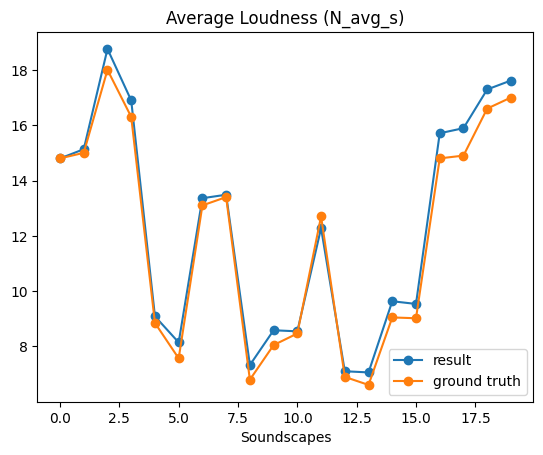

In [74]:
# Average loudness
plt.figure()
plt.plot(N_avg, "o-", label="result")
plt.plot(ground_truth[:,1], "o-", label="ground truth")
#plt.plot(N_avg_r, "o-", label="result_R")
#plt.plot(N_avg_l, "o-", label="result_L")
plt.xlabel('Soundscapes')
plt.title("Average Loudness (N_avg_s)")
plt.legend()
plt.show()

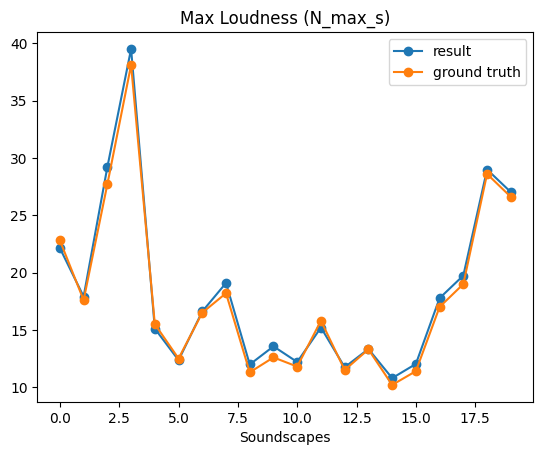

In [76]:
# Maximum loudness
plt.figure()
plt.plot(N_max, "o-", label="result")
plt.plot(ground_truth[:,2], "o-", label="ground truth")
#plt.plot(N_max_r, "o-", label="result_R")
#plt.plot(N_max_l, "o-", label="result_L")
plt.xlabel('Soundscapes')
plt.title("Max Loudness (N_max_s)")
plt.legend()
plt.show()

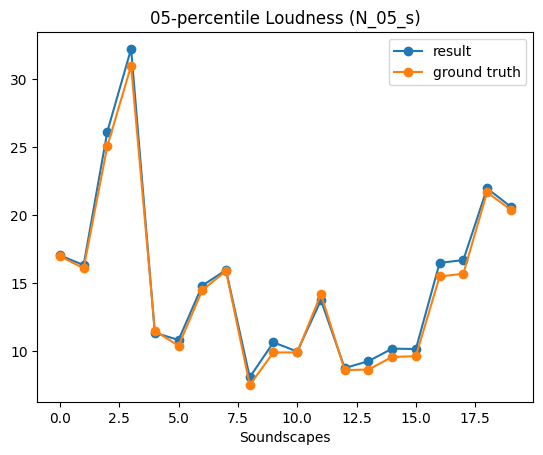

In [75]:
# 05-Percentile loudness
plt.figure()
plt.plot(N_05, "o-", label="result")
plt.plot(ground_truth[:,3], "o-", label="ground truth")
#plt.plot(N_05_r, "o-", label="result_R")
#plt.plot(N_05_l, "o-", label="result_L")
plt.xlabel('Soundscapes')
plt.title("05-percentile Loudness (N_05_s)")
plt.legend()
plt.show()

# Comparing different non-augmented soundscapes calculation VS ground-truth MORE PARAMETRES- loudness

# Comparing different non-augmented soundscapes calculation VS ground-truth - sharpness

In [47]:
# repeat with sharpness

# R0001_segment_binaural_44100_1.wav
#L
S_l_0001_1, time_axis_l_0001_1 = sharpness_din_tv(sigL_0001_1, fs, field_type="free", skip=0.5)
S_avg_l_0001_1=np.mean(S_l_0001_1)
S_max_l_0001_1=np.max(S_l_0001_1)
S_05_l_0001_1=np.percentile(S_l_0001_1,95)
#R
S_r_0001_1, time_axis_r_0001_1 = sharpness_din_tv(sigR_0001_1, fs, field_type="free", skip=0.5)
S_avg_r_0001_1=np.mean(S_r_0001_1)
S_max_r_0001_1=np.max(S_r_0001_1)
S_05_r_0001_1=np.percentile(S_r_0001_1,95)

# R0001_segment_binaural_44100_2.wav
#L
S_l_0001_2, time_axis_l_0001_2 = sharpness_din_tv(sigL_0001_2, fs, field_type="free", skip=0.5)
S_avg_l_0001_2=np.mean(S_l_0001_2)
S_max_l_0001_2=np.max(S_l_0001_2)
S_05_l_0001_2=np.percentile(S_l_0001_2,95)
#R
S_r_0001_2, time_axis_r_0001_2 = sharpness_din_tv(sigR_0001_2, fs, field_type="free", skip=0.5)
S_avg_r_0001_2=np.mean(S_r_0001_2)
S_max_r_0001_2=np.max(S_r_0001_2)
S_05_r_0001_2=np.percentile(S_r_0001_2,95)

# R0002_segment_binaural_44100_1.wav
#L
S_l_0002_1, time_axis_l_0002_1 = sharpness_din_tv(sigL_0002_1, fs, field_type="free", skip=0.5)
S_avg_l_0002_1=np.mean(S_l_0002_1)
S_max_l_0002_1=np.max(S_l_0002_1)
S_05_l_0002_1=np.percentile(S_l_0002_1,95)
#R
S_r_0002_1, time_axis_r_0002_1 = sharpness_din_tv(sigR_0002_1, fs, field_type="free", skip=0.5)
S_avg_r_0002_1=np.mean(S_r_0002_1)
S_max_r_0002_1=np.max(S_r_0002_1)
S_05_r_0002_1=np.percentile(S_r_0002_1,95)

# R0002_segment_binaural_44100_2.wav
#L
S_l_0002_2, time_axis_l_0002_2 = sharpness_din_tv(sigL_0002_2, fs, field_type="free", skip=0.5)
S_avg_l_0002_2=np.mean(S_l_0002_2)
S_max_l_0002_2=np.max(S_l_0002_2)
S_05_l_0002_2=np.percentile(S_l_0002_2,95)
#R
S_r_0002_2, time_axis_r_0002_2 = sharpness_din_tv(sigR_0002_2, fs, field_type="free", skip=0.5)
S_avg_r_0002_2=np.mean(S_r_0002_2)
S_max_r_0002_2=np.max(S_r_0002_2)
S_05_r_0002_2=np.percentile(S_r_0002_2,95)

# R0003_segment_binaural_44100_1.wav
#L
S_l_0003_1,time_axis_l_0003_1 = sharpness_din_tv(sigL_0003_1, fs, field_type="free", skip=0.5)
S_avg_l_0003_1=np.mean(S_l_0003_1)
S_max_l_0003_1=np.max(S_l_0003_1)
S_05_l_0003_1=np.percentile(S_l_0003_1,95)
#R
S_r_0003_1,  time_axis_r_0003_1 = sharpness_din_tv(sigR_0003_1, fs, field_type="free", skip=0.5)
S_avg_r_0003_1=np.mean(S_r_0003_1)
S_max_r_0003_1=np.max(S_r_0003_1)
S_05_r_0003_1=np.percentile(S_r_0003_1,95)

# R0003_segment_binaural_44100_2.wav
#L
S_l_0003_2,  time_axis_l_0003_2 = sharpness_din_tv(sigL_0003_2, fs, field_type="free", skip=0.5)
S_avg_l_0003_2=np.mean(S_l_0003_2)
S_max_l_0003_2=np.max(S_l_0003_2)
S_05_l_0003_2=np.percentile(S_l_0003_2,95)
#R
S_r_0003_2, time_axis_r_0003_2 = sharpness_din_tv(sigR_0003_2, fs, field_type="free", skip=0.5)
S_avg_r_0003_2=np.mean(S_r_0003_2)
S_max_r_0003_2=np.max(S_r_0003_2)
S_05_r_0003_2=np.percentile(S_r_0003_2,95)

# R0004_segment_binaural_44100_1.wav
#L
S_l_0004_1, time_axis_l_0004_1 = sharpness_din_tv(sigL_0004_1, fs, field_type="free", skip=0.5)
S_avg_l_0004_1=np.mean(S_l_0004_1)
S_max_l_0004_1=np.max(S_l_0004_1)
S_05_l_0004_1=np.percentile(S_l_0004_1,95)
#R
S_r_0004_1, time_axis_r_0004_1 = sharpness_din_tv(sigR_0004_1, fs, field_type="free", skip=0.5)
S_avg_r_0004_1=np.mean(S_r_0004_1)
S_max_r_0004_1=np.max(S_r_0004_1)
S_05_r_0004_1=np.percentile(S_r_0004_1,95)

# R0004_segment_binaural_44100_2.wav
#L
S_l_0004_2,  time_axis_l_0004_2 = sharpness_din_tv(sigL_0004_2, fs, field_type="free", skip=0.5)
S_avg_l_0004_2=np.mean(S_l_0004_2)
S_max_l_0004_2=np.max(S_l_0004_2)
S_05_l_0004_2=np.percentile(S_l_0004_2,95)
#R
S_r_0004_2,  time_axis_r_0004_2 = sharpness_din_tv(sigR_0004_2, fs, field_type="free", skip=0.5)
S_avg_r_0004_2=np.mean(S_r_0004_2)
S_max_r_0004_2=np.max(S_r_0004_2)
S_05_r_0004_2=np.percentile(S_r_0004_2,95)

# R0005_segment_binaural_44100_1.wav
#L
S_l_0005_1, time_axis_l_0005_1 = sharpness_din_tv(sigL_0005_1, fs, field_type="free", skip=0.5)
S_avg_l_0005_1=np.mean(S_l_0005_1)
S_max_l_0005_1=np.max(S_l_0005_1)
S_05_l_0005_1=np.percentile(S_l_0005_1,95)
#R
S_r_0005_1,  time_axis_r_0005_1 = sharpness_din_tv(sigR_0005_1, fs, field_type="free", skip=0.5)
S_avg_r_0005_1=np.mean(S_r_0005_1)
S_max_r_0005_1=np.max(S_r_0005_1)
S_05_r_0005_1=np.percentile(S_r_0005_1,95)

# R0005_segment_binaural_44100_2.wav
#L
S_l_0005_2,  time_axis_l_0005_2 = sharpness_din_tv(sigL_0005_2, fs, field_type="free", skip=0.5)
S_avg_l_0005_2=np.mean(S_l_0005_2)
S_max_l_0005_2=np.max(S_l_0005_2)
S_05_l_0005_2=np.percentile(S_l_0005_2,95)
#R
S_r_0005_2, time_axis_r_0005_2 = sharpness_din_tv(sigR_0005_2, fs, field_type="free", skip=0.5)
S_avg_r_0005_2=np.mean(S_r_0005_2)
S_max_r_0005_2=np.max(S_r_0005_2)
S_05_r_0005_2=np.percentile(S_r_0005_2,95)

# R0006_segment_binaural_44100_1.wav
#L
S_l_0006_1,  time_axis_l_0006_1 = sharpness_din_tv(sigL_0006_1, fs, field_type="free", skip=0.5)
S_avg_l_0006_1=np.mean(S_l_0006_1)
S_max_l_0006_1=np.max(S_l_0006_1)
S_05_l_0006_1=np.percentile(S_l_0006_1,95)
#R
S_r_0006_1,  time_axis_r_0006_1 = sharpness_din_tv(sigR_0006_1, fs, field_type="free", skip=0.5)
S_avg_r_0006_1=np.mean(S_r_0006_1)
S_max_r_0006_1=np.max(S_r_0006_1)
S_05_r_0006_1=np.percentile(S_r_0006_1,95)

# R0006_segment_binaural_44100_2.wav
#L
S_l_0006_2,  time_axis_l_0006_2 = sharpness_din_tv(sigL_0006_2, fs, field_type="free", skip=0.5)
S_avg_l_0006_2=np.mean(S_l_0006_2)
S_max_l_0006_2=np.max(S_l_0006_2)
S_05_l_0006_2=np.percentile(S_l_0006_2,95)
#R
S_r_0006_2,  time_axis_r_0006_2 = sharpness_din_tv(sigR_0006_2, fs, field_type="free", skip=0.5)
S_avg_r_0006_2=np.mean(S_r_0006_2)
S_max_r_0006_2=np.max(S_r_0006_2)
S_05_r_0006_2=np.percentile(S_r_0006_2,95)

# R0007_segment_binaural_44100_1.wav
#L
S_l_0007_1, time_axis_l_0007_1 = sharpness_din_tv(sigL_0007_1, fs, field_type="free", skip=0.5)
S_avg_l_0007_1=np.mean(S_l_0007_1)
S_max_l_0007_1=np.max(S_l_0007_1)
S_05_l_0007_1=np.percentile(S_l_0007_1,95)
#R
S_r_0007_1, time_axis_r_0007_1 = sharpness_din_tv(sigR_0007_1, fs, field_type="free", skip=0.5)
S_avg_r_0007_1=np.mean(S_r_0007_1)
S_max_r_0007_1=np.max(S_r_0007_1)
S_05_r_0007_1=np.percentile(S_r_0007_1,95)

# R0007_segment_binaural_44100_2.wav
#L
S_l_0007_2,  time_axis_l_0007_2 = sharpness_din_tv(sigL_0007_2, fs, field_type="free", skip=0.5)
S_avg_l_0007_2=np.mean(S_l_0007_2)
S_max_l_0007_2=np.max(S_l_0007_2)
S_05_l_0007_2=np.percentile(S_l_0007_2,95)
#R
S_r_0007_2,  time_axis_r_0007_2 = sharpness_din_tv(sigR_0007_2, fs, field_type="free", skip=0.5)
S_avg_r_0007_2=np.mean(S_r_0007_2)
S_max_r_0007_2=np.max(S_r_0007_2)
S_05_r_0007_2=np.percentile(S_r_0007_2,95)

# R0008_segment_binaural_44100_1.wav
#L
S_l_0008_1, time_axis_l_0008_1 = sharpness_din_tv(sigL_0008_1, fs, field_type="free", skip=0.5)
S_avg_l_0008_1=np.mean(S_l_0008_1)
S_max_l_0008_1=np.max(S_l_0008_1)
S_05_l_0008_1=np.percentile(S_l_0008_1,95)
#R
S_r_0008_1,  time_axis_r_0008_1 = sharpness_din_tv(sigR_0008_1, fs, field_type="free", skip=0.5)
S_avg_r_0008_1=np.mean(S_r_0008_1)
S_max_r_0008_1=np.max(S_r_0008_1)
S_05_r_0008_1=np.percentile(S_r_0008_1,95)

# R0008_segment_binaural_44100_2.wav
#L
S_l_0008_2,  time_axis_l_0008_2 = sharpness_din_tv(sigL_0008_2, fs, field_type="free", skip=0.5)
S_avg_l_0008_2=np.mean(S_l_0008_2)
S_max_l_0008_2=np.max(S_l_0008_2)
S_05_l_0008_2=np.percentile(S_l_0008_2,95)
#R
S_r_0008_2, time_axis_r_0008_2 = sharpness_din_tv(sigR_0008_2, fs, field_type="free", skip=0.5)
S_avg_r_0008_2=np.mean(S_r_0008_2)
S_max_r_0008_2=np.max(S_r_0008_2)
S_05_r_0008_2=np.percentile(S_r_0008_2,95)

# R0009_segment_binaural_44100_1.wav
#L
S_l_0009_1,  time_axis_l_0009_1 = sharpness_din_tv(sigL_0009_1, fs, field_type="free", skip=0.5)
S_avg_l_0009_1=np.mean(S_l_0009_1)
S_max_l_0009_1=np.max(S_l_0009_1)
S_05_l_0009_1=np.percentile(S_l_0009_1,95)
#R
S_r_0009_1,time_axis_r_0009_1 = sharpness_din_tv(sigR_0009_1, fs, field_type="free", skip=0.5)
S_avg_r_0009_1=np.mean(S_r_0009_1)
S_max_r_0009_1=np.max(S_r_0009_1)
S_05_r_0009_1=np.percentile(S_r_0009_1,95)

# R0009_segment_binaural_44100_2.wav
#L
S_l_0009_2, time_axis_l_0009_2 = sharpness_din_tv(sigL_0009_2, fs, field_type="free", skip=0.5)
S_avg_l_0009_2=np.mean(S_l_0009_2)
S_max_l_0009_2=np.max(S_l_0009_2)
S_05_l_0009_2=np.percentile(S_l_0009_2,95)
#R
S_r_0009_2,  time_axis_r_0009_2 = sharpness_din_tv(sigR_0009_2, fs, field_type="free", skip=0.5)
S_avg_r_0009_2=np.mean(S_r_0009_2)
S_max_r_0009_2=np.max(S_r_0009_2)
S_05_r_0009_2=np.percentile(S_r_0009_2,95)

# R00010_segment_binaural_44100_1.wav
#L
S_l_0010_1,  time_axis_l_0010_1 = sharpness_din_tv(sigL_0010_1, fs, field_type="free", skip=0.5)
S_avg_l_0010_1=np.mean(S_l_0010_1)
S_max_l_0010_1=np.max(S_l_0010_1)
S_05_l_0010_1=np.percentile(S_l_0010_1,95)
#R
S_r_0010_1,  time_axis_r_0010_1 = sharpness_din_tv(sigR_0010_1, fs, field_type="free", skip=0.5)
S_avg_r_0010_1=np.mean(S_r_0010_1)
S_max_r_0010_1=np.max(S_r_0010_1)
S_05_r_0010_1=np.percentile(S_r_0010_1,95)

# R0010_segment_binaural_44100_2.wav
#L
S_l_0010_2,  time_axis_l_0010_2 = sharpness_din_tv(sigL_0010_2, fs, field_type="free", skip=0.5)
S_avg_l_0010_2=np.mean(S_l_0010_2)
S_max_l_0010_2=np.max(S_l_0010_2)
S_05_l_0010_2=np.percentile(S_l_0010_2,95)
#R
S_r_0010_2, time_axis_r_0010_2 = sharpness_din_tv(sigR_0010_2, fs, field_type="free", skip=0.5)
S_avg_r_0010_2=np.mean(S_r_0010_2)
S_max_r_0010_2=np.max(S_r_0010_2)
S_05_r_0010_2=np.percentile(S_r_0010_2,95)

In [48]:
S_avg_l=np.array([S_avg_l_0001_1,S_avg_l_0001_2
                  ,S_avg_l_0002_1, S_avg_l_0002_2,
                  S_avg_l_0003_1, S_avg_l_0003_2,
                  S_avg_l_0004_1, S_avg_l_0004_2,
                  S_avg_l_0005_1, S_avg_l_0005_2,
                  S_avg_l_0006_1, S_avg_l_0006_2,
                  S_avg_l_0007_1, S_avg_l_0007_2,
                  S_avg_l_0008_1, S_avg_l_0008_2,
                  S_avg_l_0009_1, S_avg_l_0009_2,
                  S_avg_l_0010_1, S_avg_l_0010_2,
                  ])

S_avg_r=np.array([S_avg_r_0001_1,S_avg_r_0001_2
                  ,S_avg_r_0002_1, S_avg_r_0002_2,
                  S_avg_r_0003_1, S_avg_r_0003_2,
                  S_avg_r_0004_1, S_avg_r_0004_2,
                  S_avg_r_0005_1, S_avg_r_0005_2,
                  S_avg_r_0006_1, S_avg_r_0006_2,
                  S_avg_r_0007_1, S_avg_r_0007_2,
                  S_avg_r_0008_1, S_avg_r_0008_2,
                  S_avg_r_0009_1, S_avg_r_0009_2,
                  S_avg_r_0010_1, S_avg_r_0010_2,
                  ])

S_max_l=np.array([ S_max_l_0001_1, S_max_l_0001_2,
                  S_max_l_0002_1, S_max_l_0002_2,
                  S_max_l_0003_1, S_max_l_0003_2,
                  S_max_l_0004_1, S_max_l_0004_2,
                  S_max_l_0005_1, S_max_l_0005_2,
                  S_max_l_0006_1, S_max_l_0006_2,
                  S_max_l_0007_1, S_max_l_0007_2,
                  S_max_l_0008_1, S_max_l_0008_2,
                  S_max_l_0009_1, S_max_l_0009_2,
                  S_max_l_0010_1, S_max_l_0010_2,
                ])
S_max_r=np.array([ S_max_r_0001_1, S_max_r_0001_2,
                  S_max_r_0002_1, S_max_r_0002_2,
                  S_max_r_0003_1, S_max_r_0003_2,
                  S_max_r_0004_1, S_max_r_0004_2,
                  S_max_r_0005_1, S_max_r_0005_2,
                  S_max_r_0006_1, S_max_r_0006_2,
                  S_max_r_0007_1, S_max_r_0007_2,
                  S_max_r_0008_1, S_max_r_0008_2,
                  S_max_r_0009_1, S_max_r_0009_2,
                  S_max_r_0010_1, S_max_r_0010_2,
                ])

S_05_l=np.array([
    S_05_l_0001_1, S_05_l_0001_2,
    S_05_l_0002_1, S_05_l_0002_2,
    S_05_l_0003_1, S_05_l_0003_2,
    S_05_l_0004_1, S_05_l_0004_2,
    S_05_l_0005_1, S_05_l_0005_2,
    S_05_l_0006_1, S_05_l_0006_2,
    S_05_l_0007_1, S_05_l_0007_2,
    S_05_l_0008_1, S_05_l_0008_2,
    S_05_l_0009_1, S_05_l_0009_2,
    S_05_l_0010_1, S_05_l_0010_2,
])

S_05_r=np.array([
    S_05_r_0001_1, S_05_r_0001_2,
    S_05_r_0002_1, S_05_r_0002_2,
    S_05_r_0003_1, S_05_r_0003_2,
    S_05_r_0004_1, S_05_r_0004_2,
    S_05_r_0005_1, S_05_r_0005_2,
    S_05_r_0006_1, S_05_r_0006_2,
    S_05_r_0007_1, S_05_r_0007_2,
    S_05_r_0008_1, S_05_r_0008_2,
    S_05_r_0009_1, S_05_r_0009_2,
    S_05_r_0010_1, S_05_r_0010_2,
])

S_avg=(S_avg_l+S_avg_r)/2
S_max=(S_max_l+S_max_r)/2
S_05=(S_05_l+S_05_r)/2

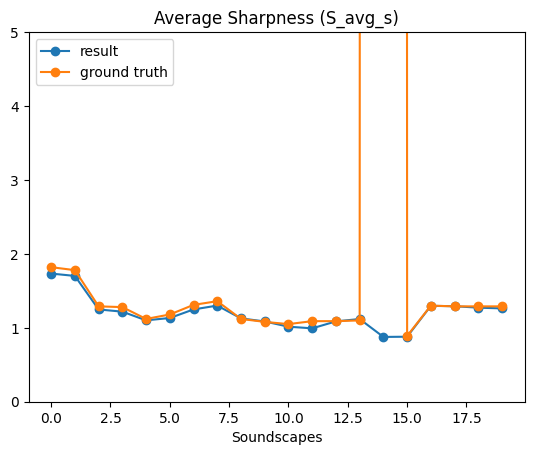

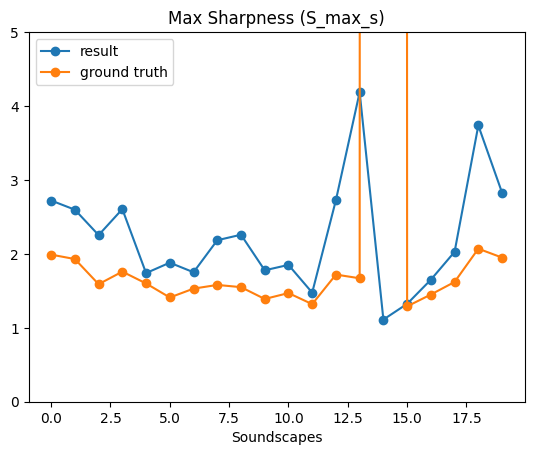

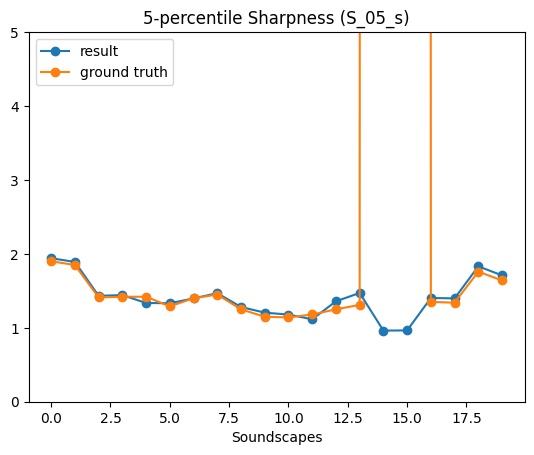

In [51]:
# Average sharpness
plt.figure()
plt.plot(S_avg, "o-", label="result")
plt.plot(ground_truth[:,14], "o-", label="ground truth")
#plt.plot(N_avg_r, "o-", label="result_R")
#plt.plot(N_avg_l, "o-", label="result_L")
plt.xlabel('Soundscapes')
plt.ylim(0,5)
plt.title("Average Sharpness (S_avg_s)")
plt.legend()
plt.show()

# Max sharpness
plt.figure()
plt.plot(S_max, "o-", label="result")
plt.plot(ground_truth[:,15], "o-", label="ground truth")
#plt.plot(N_avg_r, "o-", label="result_R")
#plt.plot(N_avg_l, "o-", label="result_L")
plt.xlabel('Soundscapes')
plt.ylim(0,5)
plt.title("Max Sharpness (S_max_s)")
plt.legend()
plt.show()

# 5% percentile sharpness
plt.figure()
plt.plot(S_05, "o-", label="result")
plt.plot(ground_truth[:,16], "o-", label="ground truth")
#plt.plot(N_avg_r, "o-", label="result_R")
#plt.plot(N_avg_l, "o-", label="result_L")
plt.ylim(0,5)
plt.xlabel('Soundscapes')
plt.title("5-percentile Sharpness (S_05_s)")
plt.legend()
plt.show()

In [44]:
# Apparently, gain=4.6 gives the best results, lets check with more features values

N_avg_true=ground_truth[0,1]
N_max_true=ground_truth[0,2]
N_05_true=ground_truth[0,3]
N_10_true=ground_truth[0,4]
N_20_true=ground_truth[0,5]
N_30_true=ground_truth[0,6]
N_40_true=ground_truth[0,7]
N_50_true=ground_truth[0,8]
N_60_true=ground_truth[0,9]
N_70_true=ground_truth[0,10]
N_80_true=ground_truth[0,11]
N_90_true=ground_truth[0,12]
N_95_true=ground_truth[0,13]

# LOAD R0001_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0001_segment_binaural_44100_1.wav"
sigL_test, fs = load(path, wav_calib=4.6, ch=0) #L
sigR_test, fs = load(path, wav_calib=4.6, ch=1) #R

# Calculate loudness
#L
N_l_test, N_spec_l_test, bark_axis_l_test, time_axis_l_test = loudness_zwtv(sigL_test, fs, field_type="free")
N_avg_l_test=np.mean(N_l_test)
N_max_l_test=np.max(N_l_test)
N_05_l_test=np.percentile(N_l_test,95)
N_10_l_test=np.percentile(N_l_test,90)
N_20_l_test=np.percentile(N_l_test,80)
N_30_l_test=np.percentile(N_l_test,70)
N_40_l_test=np.percentile(N_l_test,60)
N_50_l_test=np.percentile(N_l_test,50)
N_60_l_test=np.percentile(N_l_test,40)
N_70_l_test=np.percentile(N_l_test,30)
N_80_l_test=np.percentile(N_l_test,20)
N_90_l_test=np.percentile(N_l_test,10)
N_95_l_test=np.percentile(N_l_test,5)
print("loudness L calculated")
#R
N_r_test, N_spec_r_test, bark_axis_r_test, time_axis_r_test = loudness_zwtv(sigR_test, fs, field_type="free")
N_avg_r_test=np.mean(N_r_test)
N_max_r_test=np.max(N_r_test)
N_05_r_test=np.percentile(N_r_test,95)
N_10_r_test=np.percentile(N_r_test,90)
N_20_r_test=np.percentile(N_r_test,80)
N_30_r_test=np.percentile(N_r_test,70)
N_40_r_test=np.percentile(N_r_test,60)
N_50_r_test=np.percentile(N_r_test,50)
N_60_r_test=np.percentile(N_r_test,40)
N_70_r_test=np.percentile(N_r_test,30)
N_80_r_test=np.percentile(N_r_test,20)
N_90_r_test=np.percentile(N_r_test,10)
N_95_r_test=np.percentile(N_r_test,5)
print("loudness R calculated")

N_avg_test=(N_avg_r_test+ N_avg_l_test)/2
N_max_test=(N_max_r_test+ N_max_l_test)/2
N_05_test=(N_05_r_test+N_05_l_test)/2
N_10_test=(N_10_r_test+N_10_l_test)/2
N_20_test=(N_20_r_test+N_20_l_test)/2
N_30_test=(N_30_r_test+N_30_l_test)/2
N_40_test=(N_40_r_test+N_40_l_test)/2
N_50_test=(N_50_r_test+N_50_l_test)/2
N_60_test=(N_60_r_test+N_60_l_test)/2
N_70_test=(N_70_r_test+N_70_l_test)/2
N_80_test=(N_80_r_test+N_80_l_test)/2
N_90_test=(N_90_r_test+N_90_l_test)/2
N_95_test=(N_95_r_test+N_95_l_test)/2

print("Navg, ground truth ",N_avg_true ," and result ",N_avg_test )
print("Nmax, ground truth ",N_max_true ," and result ", N_max_test)
print("N05, ground truth ",N_05_true ," and result ",N_05_test )
print("N10, ground truth ",N_10_true ," and result ",N_10_test )
print("N20, ground truth ",N_20_true ," and result ",N_20_test )
print("N30, ground truth ",N_30_true ," and result ",N_30_test )
print("N40, ground truth ",N_40_true ," and result ",N_40_test )
print("N50, ground truth ",N_50_true ," and result ",N_50_test )
print("N60, ground truth ",N_60_true ," and result ",N_60_test )
print("N70, ground truth ",N_70_true ," and result ",N_70_test )
print("N80, ground truth ",N_80_true ," and result ",N_80_test )
print("N90, ground truth ",N_90_true ," and result ",N_90_test )
print("N95, ground truth ",N_95_true ," and result ",N_95_test )

loudness L calculated
loudness R calculated
Navg, ground truth  14.8  and result  14.7977869361544
Nmax, ground truth  22.8  and result  22.128871550623497
N05, ground truth  17.0  and result  17.057925978771337
N10, ground truth  15.8  and result  15.943368095887774
N20, ground truth  15.2  and result  15.3120614326792
N30, ground truth  14.9  and result  14.98245556818376
N40, ground truth  14.7  and result  14.74071345138461
N50, ground truth  14.5  and result  14.537622821593898
N60, ground truth  14.3  and result  14.363076055725461
N70, ground truth  14.2  and result  14.184954787884982
N80, ground truth  14.0  and result  13.99513005425029
N90, ground truth  13.8  and result  13.762757479823184
N95, ground truth  13.6  and result  13.580102154273641


# Comparing different non-augmented soundscapes calculation VS ground-truth - roughness

In [4]:
R_avg_true=0.0234
R_max_true=0.0684
R_05_true=0.034

# LOAD R0001_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0001_segment_binaural_44100_1.wav"
sigL_test, fs = load(path, wav_calib=4.6, ch=0) #L
sigR_test, fs = load(path, wav_calib=4.6, ch=1) #R

# Calculate sharpness
#L
R_l_test, R_spec_l_test, _, _= roughness_dw(sigL_test, fs, 0)
R_avg_l_test=np.mean(R_l_test)
R_max_l_test=np.max(R_l_test)
R_05_l_test=np.percentile(R_l_test,95)
#R
R_r_test,R_spec_r_test,_,_ = roughness_dw(sigR_test, fs, 0)
R_avg_r_test=np.mean(R_r_test)
R_max_r_test=np.max(R_r_test)
R_05_r_test=np.percentile(R_r_test,95)

R_avg_test=(R_avg_r_test+ R_avg_l_test)/2
R_max_test=(R_max_r_test+ R_max_l_test)/2
R_05_test=(R_05_r_test+R_05_l_test)/2

print("R_avg, ground truth ",R_avg_true ," and result ",R_avg_test )
print("Rmax, ground truth ",R_max_true ," and result ", R_max_test)
print("R05, ground truth ",R_05_true ," and result ",R_05_test )

# NOT THE CORRECT FORMULA


R_avg, ground truth  0.0234  and result  0.04967090882072075
Rmax, ground truth  0.0684  and result  0.1771842365234356
R05, ground truth  0.034  and result  0.0977160795348132


# Comparing different non-augmented soundscapes calculation VS ground-truth - tonality

In [64]:
# lets try with tonality

T_avg_true=0.0592
T_max_true=1.04
T_05_true=0.29

# LOAD R0001_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0001_segment_binaural_44100_1.wav"
sigL_test, fs = load(path, wav_calib=4.6, ch=0) #L
sigR_test, fs = load(path, wav_calib=4.6, ch=1) #R

# Calculate sharpness
#L
tT_l_test, T_l_test, _, _,_= tnr_ecma_tv(sigL_test, fs,prominence=True, overlap=0)
print(" L ",T_l_test, tT_l_test)
T_avg_l_test=np.mean(T_l_test)
T_max_l_test=np.max(T_l_test)
T_05_l_test=np.percentile(T_l_test,95)
#R
_, T_r_test, _, _,_= tnr_ecma_tv(sigR_test, fs,prominence=True, overlap=0)
print(" R ",T_r_test )
T_avg_r_test=np.mean(T_r_test)
T_max_r_test=np.max(T_r_test)
T_05_r_test=np.percentile(T_r_test,95)

T_avg_test=(T_avg_r_test+ T_avg_l_test)/2
T_max_test=(T_max_r_test+ T_max_l_test)/2
T_05_test=(T_05_r_test+T_05_l_test)/2

print("T_avg, ground truth ",T_avg_true ," and result ",T_avg_test )
print("Tmax, ground truth ",T_max_true ," and result ", T_max_test)
print("T05, ground truth ",T_05_true ," and result ",T_05_test )

 L  [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 R  [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
T_avg, ground truth  0.0592  and result  nan
Tmax, ground truth  1.04  and result  nan
T05, ground truth  0.29  and result  nan


# Comparing different non-augmented soundscapes calculation VS ground-truth - LAeq

In [46]:
from numpy import pi, convolve
from scipy.signal.filter_design import bilinear
from scipy.signal import lfilter

def A_weighting(Fs):
    """Design of an A-weighting filter.
    
    B, A = A_weighting(Fs) designs a digital A-weighting filter for 
    sampling frequency Fs. Usage: y = lfilter(B, A, x).
    Warning: Fs should normally be higher than 20 kHz. For example, 
    Fs = 48000 yields a class 1-compliant filter.
    
    Originally a MATLAB script. Also included ASPEC, CDSGN, CSPEC.
    
    Author: Christophe Couvreur, Faculte Polytechnique de Mons (Belgium)
            couvreur@thor.fpms.ac.be
    Last modification: Aug. 20, 1997, 10:00am.
    
    http://www.mathworks.com/matlabcentral/fileexchange/69
    http://replaygain.hydrogenaudio.org/mfiles/adsgn.m
    Translated from adsgn.m to PyLab 2009-07-14 endolith@gmail.com
    
    References: 
       [1] IEC/CD 1672: Electroacoustics-Sound Level Meters, Nov. 1996.
    
    """
    # Definition of analog A-weighting filter according to IEC/CD 1672.
    f1 = 20.598997
    f2 = 107.65265
    f3 = 737.86223
    f4 = 12194.217
    A1000 = 1.9997
    
    NUMs = [(2 * pi * f4)**2 * (10**(A1000/20)), 0, 0, 0, 0]
    DENs = convolve([1, +4 * pi * f4, (2 * pi * f4)**2], 
                    [1, +4 * pi * f1, (2 * pi * f1)**2], mode='full')
    DENs = convolve(convolve(DENs, [1, 2 * pi * f3], mode='full'), 
                                   [1, 2 * pi * f2], mode='full')
    
    # Use the bilinear transformation to get the digital filter.
    # (Octave, MATLAB, and PyLab disagree about Fs vs 1/Fs)
    return bilinear(NUMs, DENs, Fs)


def C_weighting(fs):
    f1 = 20.598997 
    f4 = 12194.217
    C1000 = 0.0619

    NUMs = [(2*pi*f4)**2*(10**(C1000/20.0)),0,0]
    DENs = np.polymul([1,4*pi*f4,(2*pi*f4)**2.0],[1,4*pi*f1,(2*pi*f1)**2]) 

    #Use the bilinear transformation to get the digital filter. 
    return bilinear(NUMs,DENs,fs)


"https://gist.github.com/endolith/148112/cbf8fea907ed3998d8469b776f7245adae862282"


/var/folders/87/rtp1hhtx2tgcw5x4mgt4m00m0000gn/T/ipykernel_81054/1986567369.py:2: DeprecationWarning: Please use `bilinear` from the `scipy.signal` namespace, the `scipy.signal.filter_design` namespace is deprecated.
  from scipy.signal.filter_design import bilinear


'https://gist.github.com/endolith/148112/cbf8fea907ed3998d8469b776f7245adae862282'

In [47]:

# LOAD R0001_segment_binaural_44100_1.wav
path = "../data/soundscapes/R0001_segment_binaural_44100_2.wav"
sigL, fs = load(path, wav_calib=4.6, ch=0) #L
sigR, fs = load(path, wav_calib=4.6, ch=1) #R


[B,A] = A_weighting(fs)
sigL_A = lfilter(B,A,sigL)
sigR_A = lfilter(B,A,sigR)

sigL_0001_1_A = lfilter(B,A,sigL_0001_1) #L
sigR_0001_1_A = lfilter(B,A,sigR_0001_1) #R

sigL_0001_2_A = lfilter(B,A,sigL_0001_2) #L
sigR_0001_2_A = lfilter(B,A,sigR_0001_2) #R

sigL_0002_1_A = lfilter(B,A,sigL_0002_1) #L
sigR_0002_1_A = lfilter(B,A,sigR_0002_1) #R

sigL_0002_2_A = lfilter(B,A,sigL_0002_2) #L
sigR_0002_2_A = lfilter(B,A,sigR_0002_2) #R

sigL_0003_1_A = lfilter(B,A,sigL_0003_1) #L
sigR_0003_1_A = lfilter(B,A,sigR_0003_1) #R

sigL_0003_2_A = lfilter(B,A,sigL_0003_2) #L
sigR_0003_2_A = lfilter(B,A,sigR_0003_2) #R

sigL_0004_1_A = lfilter(B,A,sigL_0004_1) #L
sigR_0004_1_A = lfilter(B,A,sigR_0004_1) #R

sigL_0004_2_A = lfilter(B,A,sigL_0004_2) #L
sigR_0004_2_A = lfilter(B,A,sigR_0004_2) #R

sigL_0005_1_A = lfilter(B,A,sigL_0005_1) #L
sigR_0005_1_A = lfilter(B,A,sigR_0005_1) #R

sigL_0005_2_A = lfilter(B,A,sigL_0005_2) #L
sigR_0005_2_A = lfilter(B,A,sigR_0005_2) #R

sigL_0006_1_A = lfilter(B,A,sigL_0006_1) #L
sigR_0006_1_A = lfilter(B,A,sigR_0006_1) #R

sigL_0006_2_A = lfilter(B,A,sigL_0006_2) #L
sigR_0006_2_A = lfilter(B,A,sigR_0006_2) #R

sigL_0007_1_A = lfilter(B,A,sigL_0007_1) #L
sigR_0007_1_A = lfilter(B,A,sigR_0007_1) #R

sigL_0007_2_A = lfilter(B,A,sigL_0007_2) #L
sigR_0007_2_A = lfilter(B,A,sigR_0007_2) #R

sigL_0008_1_A = lfilter(B,A,sigL_0008_1) #L
sigR_0008_1_A = lfilter(B,A,sigR_0008_1) #R

sigL_0008_2_A = lfilter(B,A,sigL_0008_2) #L
sigR_0008_2_A = lfilter(B,A,sigR_0008_2) #R

sigL_0009_1_A = lfilter(B,A,sigL_0009_1) #L
sigR_0009_1_A = lfilter(B,A,sigR_0009_1) #R

sigL_0009_2_A = lfilter(B,A,sigL_0009_2) #L
sigR_0009_2_A = lfilter(B,A,sigR_0009_2) #R

sigL_0010_1_A = lfilter(B,A,sigL_0010_1) #L
sigR_0010_1_A = lfilter(B,A,sigR_0010_1) #R

sigL_0010_2_A = lfilter(B,A,sigL_0010_2) #L
sigR_0010_2_A = lfilter(B,A,sigR_0010_2) #R


[58.45569096 68.56791363 71.37329203 ...         nan         nan
         nan] 82.56460802013436 -61.241808297316325 66.89354576031397


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maad/spl/conversion_SPL.py:211: RuntimeWarning: invalid value encountered in log10
  L = 20*log10(p/pRef)


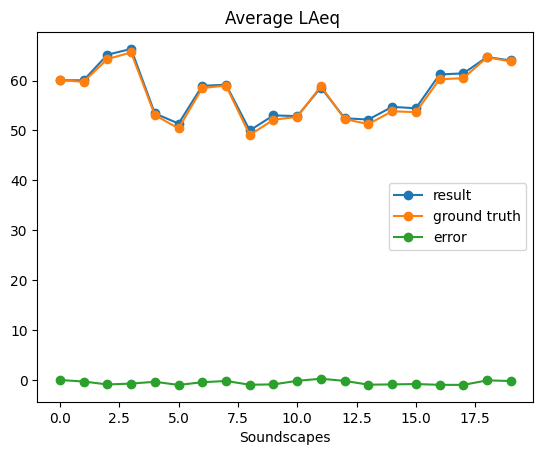

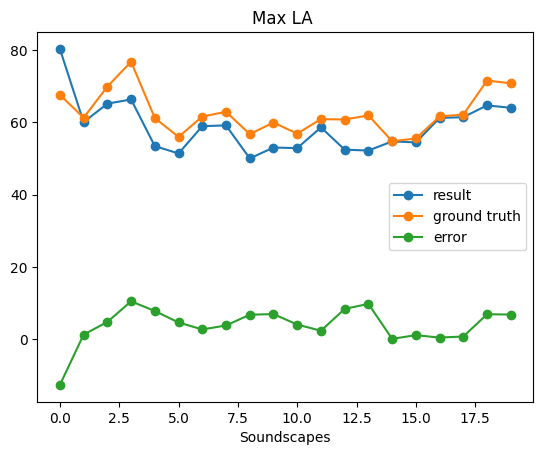

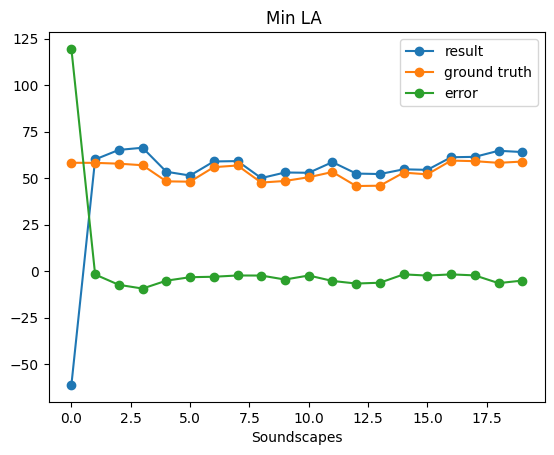

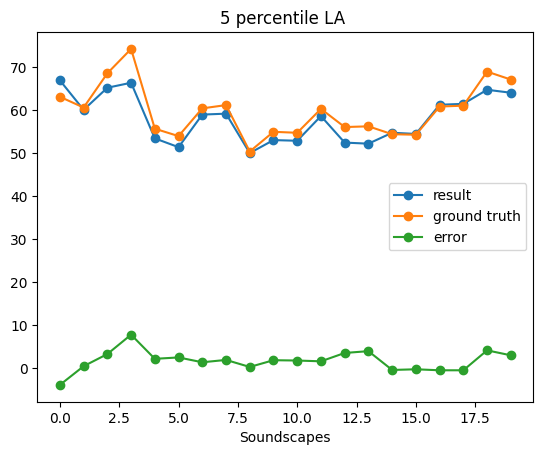

In [49]:
LAeq_groundtruth = np.array([60.06, 59.76, 64.3, 65.63, 53.08, 50.41, 58.51, 58.98, 49.08, 52.16, 52.72, 58.87, 52.28, 51.27, 53.86, 53.66, 60.27, 60.47, 64.65, 63.83])
LAmax_groundtruth=np.array([67.63, 61.28, 69.91, 76.78, 61.19, 55.97, 61.61, 62.92, 56.75, 59.94, 56.88, 60.9, 60.79, 61.93, 54.78, 55.53, 61.63, 62.14, 71.58, 70.8])
LAmin_groundtruth=np.array([58.25, 58.21, 57.77, 56.93, 48.26, 48.08, 55.89, 56.79, 47.6, 48.47, 50.48, 53.29, 45.74, 45.92, 52.95, 52.03, 59.44, 59.11, 58.22, 58.91])
LA05_groundtruth=np.array([63.08, 60.58, 68.53, 74.19, 55.67, 53.95, 60.39, 61.15, 50.37, 54.95, 54.72, 60.27, 56.05, 56.22, 54.39, 54.27, 60.81, 61.02, 68.92, 67.08])


LAeqL_0001_1 = mean_dB(pressure2leq(sigL_0001_1_A, fs))
LAeqR_0001_1 = mean_dB(pressure2leq(sigR_0001_1_A, fs))
LAeqS_0001_1 =mean_dB([LAeqL_0001_1,LAeqR_0001_1])
LAmaxL_0001_1 =np.max(pressure2dBSPL(np.abs(sigL_0001_1_A)))
LAmaxR_0001_1 =np.max(pressure2dBSPL(np.abs(sigR_0001_1_A)))
LAmax_0001_1=mean_dB(LAmaxL_0001_1,LAmaxR_0001_1)
LAminL_0001_1 =np.nanmin(pressure2dBSPL(np.abs(sigL_0001_1_A)))
LAminR_0001_1 =np.nanmin(pressure2dBSPL(np.abs(sigL_0001_1_A)))
LAmin_0001_1=mean_dB(LAminL_0001_1,LAminR_0001_1)
LA05L_0001_1 =np.percentile(pressure2dBSPL(np.abs(sigL_0001_1_A)), 95)
LA05R_0001_1 =np.percentile(pressure2dBSPL(np.abs(sigL_0001_1_A)), 95)
LA05_0001_1=mean_dB(LA05L_0001_1,LA05R_0001_1)

print(pressure2dBSPL(sigL_0001_1_A), LAmaxL_0001_1, LAminL_0001_1, LA05L_0001_1)


LAeqL_0001_2 = mean_dB(pressure2leq(sigL_0001_2_A, fs))
LAeqR_0001_2 = mean_dB(pressure2leq(sigR_0001_2_A, fs))
LAeqS_0001_2 =mean_dB([LAeqL_0001_2,LAeqR_0001_2])
LAeqS_0001_2 =mean_dB([LAeqL_0001_1,LAeqR_0001_1])
LAmax_0001_2 =np.max(LAeqS_0001_2)
LAmin_0001_2 =np.min(LAeqS_0001_2)
LA05_0001_2 =np.percentile(LAeqS_0001_2, 95)

LAeqL_0002_1 = mean_dB(pressure2leq(sigL_0002_1_A, fs))
LAeqR_0002_1 = mean_dB(pressure2leq(sigR_0002_1_A, fs))
LAeqS_0002_1 = mean_dB([LAeqL_0002_1, LAeqR_0002_1])
LAmaxL_0002_1 = np.max(LAeqL_0002_1)
LAmaxR_0002_1 = np.max(LAeqR_0002_1)
LAmax_0002_1 = mean_dB([LAmaxL_0002_1, LAmaxR_0002_1])
LAminL_0002_1 = np.min(LAeqL_0002_1)
LAminR_0002_1 = np.min(LAeqR_0002_1)
LAmin_0002_1 = mean_dB([LAminL_0002_1, LAminR_0002_1])
LA05L_0002_1 = np.percentile(LAeqL_0002_1, 95)
LA05R_0002_1 = np.percentile(LAeqR_0002_1, 95)
LA05_0002_1 = mean_dB([LA05L_0002_1, LA05R_0002_1])

LAeqL_0002_2 = mean_dB(pressure2leq(sigL_0002_2_A, fs))
LAeqR_0002_2 = mean_dB(pressure2leq(sigR_0002_2_A, fs))
LAeqS_0002_2 =mean_dB([LAeqL_0002_2,LAeqR_0002_2])
LAmax_0002_2 =np.max(LAeqS_0002_2)
LAmin_0002_2 =np.min(LAeqS_0002_2)
LA05_0002_2 =np.percentile(LAeqS_0002_2, 95)

LAeqL_0003_1 = mean_dB(pressure2leq(sigL_0003_1_A, fs))
LAeqR_0003_1 = mean_dB(pressure2leq(sigR_0003_1_A, fs))
LAeqS_0003_1 =mean_dB([LAeqL_0003_1,LAeqR_0003_1])
LAmax_0003_1 =np.max(LAeqS_0003_1)
LAmin_0003_1 =np.min(LAeqS_0003_1)
LA05_0003_1 =np.percentile(LAeqS_0003_1, 95)

LAeqL_0003_2 = mean_dB(pressure2leq(sigL_0003_2_A, fs))
LAeqR_0003_2 = mean_dB(pressure2leq(sigR_0003_2_A, fs))
LAeqS_0003_2 =mean_dB([LAeqL_0003_2,LAeqR_0003_2])
LAmax_0003_2 =np.max(LAeqS_0003_2)
LAmin_0003_2 =np.min(LAeqS_0003_2)
LA05_0003_2 =np.percentile(LAeqS_0003_2, 95)

LAeqL_0004_1 = mean_dB(pressure2leq(sigL_0004_1_A, fs))
LAeqR_0004_1 = mean_dB(pressure2leq(sigR_0004_1_A, fs))
LAeqS_0004_1 =mean_dB([LAeqL_0004_1,LAeqR_0004_1])
LAmax_0004_1 =np.max(LAeqS_0004_1)
LAmin_0004_1 =np.min(LAeqS_0004_1)
LA05_0004_1 =np.percentile(LAeqS_0004_1, 95)

LAeqL_0004_2 = mean_dB(pressure2leq(sigL_0004_2_A, fs))
LAeqR_0004_2 = mean_dB(pressure2leq(sigR_0004_2_A, fs))
LAeqS_0004_2 =mean_dB([LAeqL_0004_2,LAeqR_0004_2])
LAmax_0004_2 =np.max(LAeqS_0004_2)
LAmin_0004_2 =np.min(LAeqS_0004_2)
LA05_0004_2 =np.percentile(LAeqS_0004_2, 95)

LAeqL_0005_1 = mean_dB(pressure2leq(sigL_0005_1_A, fs))
LAeqR_0005_1 = mean_dB(pressure2leq(sigR_0005_1_A, fs))
LAeqS_0005_1 =mean_dB([LAeqL_0005_1,LAeqR_0005_1])
LAmax_0005_1 =np.max(LAeqS_0005_1)
LAmin_0005_1 =np.min(LAeqS_0005_1)
LA05_0005_1 =np.percentile(LAeqS_0005_1, 95)

LAeqL_0005_2 = mean_dB(pressure2leq(sigL_0005_2_A, fs))
LAeqR_0005_2 = mean_dB(pressure2leq(sigR_0005_2_A, fs))
LAeqS_0005_2 =mean_dB([LAeqL_0005_2,LAeqR_0005_2])
LAmax_0005_2 =np.max(LAeqS_0005_2)
LAmin_0005_2 =np.min(LAeqS_0005_2)
LA05_0005_2 =np.percentile(LAeqS_0005_2, 95)

LAeqL_0006_1 = mean_dB(pressure2leq(sigL_0006_1_A, fs))
LAeqR_0006_1 = mean_dB(pressure2leq(sigR_0006_1_A, fs))
LAeqS_0006_1 =mean_dB([LAeqL_0006_1,LAeqR_0006_1])
LAmax_0006_1 =np.max(LAeqS_0006_1)
LAmin_0006_1 =np.min(LAeqS_0006_1)
LA05_0006_1 =np.percentile(LAeqS_0006_1, 95)

LAeqL_0006_2 = mean_dB(pressure2leq(sigL_0006_2_A, fs))
LAeqR_0006_2 = mean_dB(pressure2leq(sigR_0006_2_A, fs))
LAeqS_0006_2 =mean_dB([LAeqL_0006_2,LAeqR_0006_2])
LAmax_0006_2 =np.max(LAeqS_0006_2)
LAmin_0006_2 =np.min(LAeqS_0006_2)
LA05_0006_2 =np.percentile(LAeqS_0006_2, 95)

LAeqL_0007_1 = mean_dB(pressure2leq(sigL_0007_1_A, fs))
LAeqR_0007_1 = mean_dB(pressure2leq(sigR_0007_1_A, fs))
LAeqS_0007_1 =mean_dB([LAeqL_0007_1,LAeqR_0007_1])
LAmax_0007_1 =np.max(LAeqS_0007_1)
LAmin_0007_1 =np.min(LAeqS_0007_1)
LA05_0007_1 =np.percentile(LAeqS_0007_1, 95)

LAeqL_0007_2 = mean_dB(pressure2leq(sigL_0007_2_A, fs))
LAeqR_0007_2 = mean_dB(pressure2leq(sigR_0007_2_A, fs))
LAeqS_0007_2 =mean_dB([LAeqL_0007_2,LAeqR_0007_2])
LAmax_0007_2 =np.max(LAeqS_0007_2)
LAmin_0007_2 =np.min(LAeqS_0007_2)
LA05_0007_2 =np.percentile(LAeqS_0007_2, 95)

LAeqL_0008_1 = mean_dB(pressure2leq(sigL_0008_1_A, fs))
LAeqR_0008_1 = mean_dB(pressure2leq(sigR_0008_1_A, fs))
LAeqS_0008_1 =mean_dB([LAeqL_0008_1,LAeqR_0008_1])
LAmax_0008_1 =np.max(LAeqS_0008_1)
LAmin_0008_1 =np.min(LAeqS_0008_1)
LA05_0008_1 =np.percentile(LAeqS_0008_1, 95)

LAeqL_0008_2 = mean_dB(pressure2leq(sigL_0008_2_A, fs))
LAeqR_0008_2 = mean_dB(pressure2leq(sigR_0008_2_A, fs))
LAeqS_0008_2 =mean_dB([LAeqL_0008_2,LAeqR_0008_2])
LAmax_0008_2 =np.max(LAeqS_0008_2)
LAmin_0008_2 =np.min(LAeqS_0008_2)
LA05_0008_2 =np.percentile(LAeqS_0008_2, 95)

LAeqL_0009_1 = mean_dB(pressure2leq(sigL_0009_1_A, fs))
LAeqR_0009_1 = mean_dB(pressure2leq(sigR_0009_1_A, fs))
LAeqS_0009_1 =mean_dB([LAeqL_0009_1,LAeqR_0009_1])
LAmax_0009_1 =np.max(LAeqS_0009_1)
LAmin_0009_1 =np.min(LAeqS_0009_1)
LA05_0009_1 =np.percentile(LAeqS_0009_1, 95)

LAeqL_0009_2 = mean_dB(pressure2leq(sigL_0009_2_A, fs))
LAeqR_0009_2 = mean_dB(pressure2leq(sigR_0009_2_A, fs))
LAeqS_0009_2 =mean_dB([LAeqL_0009_2,LAeqR_0009_2])
LAmax_0009_2 =np.max(LAeqS_0009_2)
LAmin_0009_2 =np.min(LAeqS_0009_2)
LA05_0009_2 =np.percentile(LAeqS_0009_2, 95)

LAeqL_0010_1 = mean_dB(pressure2leq(sigL_0010_1_A, fs))
LAeqR_0010_1 = mean_dB(pressure2leq(sigR_0010_1_A, fs))
LAeqS_0010_1 =mean_dB([LAeqL_0010_1,LAeqR_0010_1])
LAmax_0010_1 =np.max(LAeqS_0010_1)
LAmin_0010_1 =np.min(LAeqS_0010_1)
LA05_0010_1 =np.percentile(LAeqS_0010_1, 95)

LAeqL_0010_2 = mean_dB(pressure2leq(sigL_0010_2_A, fs))
LAeqR_0010_2 = mean_dB(pressure2leq(sigR_0010_2_A, fs))
LAeqS_0010_2 =mean_dB([LAeqL_0010_2,LAeqR_0010_2])
LAmax_0010_2 =np.max(LAeqS_0010_2)
LAmin_0010_2 =np.min(LAeqS_0010_2)
LA05_0010_2 =np.percentile(LAeqS_0010_2, 95)

LAeqS_result=np.array([
    LAeqS_0001_1,
    LAeqS_0001_2,
    LAeqS_0002_1,
    LAeqS_0002_2,
    LAeqS_0003_1,
    LAeqS_0003_2,
    LAeqS_0004_1,
    LAeqS_0004_2,
    LAeqS_0005_1,
    LAeqS_0005_2,
    LAeqS_0006_1,
    LAeqS_0006_2,
    LAeqS_0007_1,
    LAeqS_0007_2,
    LAeqS_0008_1,
    LAeqS_0008_2,
    LAeqS_0009_1,
    LAeqS_0009_2,
    LAeqS_0010_1,
    LAeqS_0010_2,
])

LAmax_result=np.array([
    LAmax_0001_1,
    LAmax_0001_2,
    LAmax_0002_1,
    LAmax_0002_2,
    LAmax_0003_1,
    LAmax_0003_2,
    LAmax_0004_1,
    LAmax_0004_2,
    LAmax_0005_1,
    LAmax_0005_2,
    LAmax_0006_1,
    LAmax_0006_2,
    LAmax_0007_1,
    LAmax_0007_2,
    LAmax_0008_1,
    LAmax_0008_2,
    LAmax_0009_1,
    LAmax_0009_2,
    LAmax_0010_1,
    LAmax_0010_2,
])

LAmin_result=np.array([
    LAmin_0001_1,
    LAmin_0001_2,
    LAmin_0002_1,
    LAmin_0002_2,
    LAmin_0003_1,
    LAmin_0003_2,
    LAmin_0004_1,
    LAmin_0004_2,
    LAmin_0005_1,
    LAmin_0005_2,
    LAmin_0006_1,
    LAmin_0006_2,
    LAmin_0007_1,
    LAmin_0007_2,
    LAmin_0008_1,
    LAmin_0008_2,
    LAmin_0009_1,
    LAmin_0009_2,
    LAmin_0010_1,
    LAmin_0010_2,
])
LA05_result=np.array([
    LA05_0001_1,
    LA05_0001_2,
    LA05_0002_1,
    LA05_0002_2,
    LA05_0003_1,
    LA05_0003_2,
    LA05_0004_1,
    LA05_0004_2,
    LA05_0005_1,
    LA05_0005_2,
    LA05_0006_1,
    LA05_0006_2,
    LA05_0007_1,
    LA05_0007_2,
    LA05_0008_1,
    LA05_0008_2,
    LA05_0009_1,
    LA05_0009_2,
    LA05_0010_1,
    LA05_0010_2,
])

LAeq_error=LAeq_groundtruth-LAeqS_result
LAmax_error=LAmax_groundtruth-LAmax_result
LAmin_error=LAmin_groundtruth-LAmin_result
LA05_error=LA05_groundtruth-LA05_result


# Average LAeq
plt.figure()
plt.plot(LAeqS_result, "o-", label="result")
plt.plot(LAeq_groundtruth, "o-", label="ground truth")
plt.plot(LAeq_error, "o-", label="error")
#plt.plot(N_avg_r, "o-", label="result_R")
#plt.plot(N_avg_l, "o-", label="result_L")
plt.xlabel('Soundscapes')
plt.title("Average LAeq ")
plt.legend()
plt.show()

# Max LA
plt.figure()
plt.plot(LAmax_result, "o-", label="result")
plt.plot(LAmax_groundtruth, "o-", label="ground truth")
plt.plot(LAmax_error, "o-", label="error")
#plt.plot(N_avg_r, "o-", label="result_R")
#plt.plot(N_avg_l, "o-", label="result_L")
plt.xlabel('Soundscapes')
plt.title("Max LA ")
plt.legend()
plt.show()

# Min LA
plt.figure()
plt.plot(LAmin_result, "o-", label="result")
plt.plot(LAmin_groundtruth, "o-", label="ground truth")
plt.plot(LAmin_error, "o-", label="error")
#plt.plot(N_avg_r, "o-", label="result_R")
#plt.plot(N_avg_l, "o-", label="result_L")
plt.xlabel('Soundscapes')
plt.title("Min LA ")
plt.legend()
plt.show()

# 05 percentile LA
plt.figure()
plt.plot(LA05_result, "o-", label="result")
plt.plot(LA05_groundtruth, "o-", label="ground truth")
plt.plot(LA05_error, "o-", label="error")
#plt.plot(N_avg_r, "o-", label="result_R")
#plt.plot(N_avg_l, "o-", label="result_L")
plt.xlabel('Soundscapes')
plt.title("5 percentile LA ")
plt.legend()
plt.show()


# Comparing different non-augmented soundscapes calculation VS ground-truth - LCeq

In [24]:

[B,A] = C_weighting(fs)

sigL_0001_1_C = lfilter(B,A,sigL_0001_1) #L
sigR_0001_1_C = lfilter(B,A,sigR_0001_1) #R

sigL_0001_2_C = lfilter(B,A,sigL_0001_2) #L
sigR_0001_2_C = lfilter(B,A,sigR_0001_2) #R

sigL_0002_1_C = lfilter(B,A,sigL_0002_1) #L
sigR_0002_1_C = lfilter(B,A,sigR_0002_1) #R

sigL_0002_2_C = lfilter(B,A,sigL_0002_2) #L
sigR_0002_2_C = lfilter(B,A,sigR_0002_2) #R

sigL_0003_1_C = lfilter(B,A,sigL_0003_1) #L
sigR_0003_1_C = lfilter(B,A,sigR_0003_1) #R

sigL_0003_2_C = lfilter(B,A,sigL_0003_2) #L
sigR_0003_2_C = lfilter(B,A,sigR_0003_2) #R

sigL_0004_1_C = lfilter(B,A,sigL_0004_1) #L
sigR_0004_1_C = lfilter(B,A,sigR_0004_1) #R

sigL_0004_2_C = lfilter(B,A,sigL_0004_2) #L
sigR_0004_2_C = lfilter(B,A,sigR_0004_2) #R

sigL_0005_1_C = lfilter(B,A,sigL_0005_1) #L
sigR_0005_1_C = lfilter(B,A,sigR_0005_1) #R

sigL_0005_2_C = lfilter(B,A,sigL_0005_2) #L
sigR_0005_2_C = lfilter(B,A,sigR_0005_2) #R

sigL_0006_1_C = lfilter(B,A,sigL_0006_1) #L
sigR_0006_1_C = lfilter(B,A,sigR_0006_1) #R

sigL_0006_2_C = lfilter(B,A,sigL_0006_2) #L
sigR_0006_2_C = lfilter(B,A,sigR_0006_2) #R

sigL_0007_1_C = lfilter(B,A,sigL_0007_1) #L
sigR_0007_1_C = lfilter(B,A,sigR_0007_1) #R

sigL_0007_2_C = lfilter(B,A,sigL_0007_2) #L
sigR_0007_2_C = lfilter(B,A,sigR_0007_2) #R

sigL_0008_1_C = lfilter(B,A,sigL_0008_1) #L
sigR_0008_1_C = lfilter(B,A,sigR_0008_1) #R

sigL_0008_2_C = lfilter(B,A,sigL_0008_2) #L
sigR_0008_2_C = lfilter(B,A,sigR_0008_2) #R

sigL_0009_1_C = lfilter(B,A,sigL_0009_1) #L
sigR_0009_1_C = lfilter(B,A,sigR_0009_1) #R

sigL_0009_2_C = lfilter(B,A,sigL_0009_2) #L
sigR_0009_2_C = lfilter(B,A,sigR_0009_2) #R

sigL_0010_1_C = lfilter(B,A,sigL_0003_1) #L
sigR_0010_1_C = lfilter(B,A,sigR_0003_1) #R

sigL_0010_2_C = lfilter(B,A,sigL_0010_2) #L
sigR_0010_2_C = lfilter(B,A,sigR_0010_2) #R

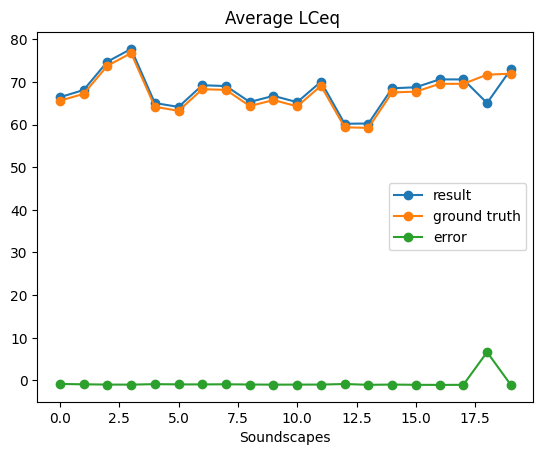

In [25]:
LCeq_groundtruth = np.array([65.58, 67.18, 73.76, 76.74, 64.17, 63.2, 68.28, 68.11, 64.33, 65.73, 64.26, 69.07, 59.34, 59.21, 67.52, 67.71, 69.53, 69.54, 71.68, 71.91])


LCeqL_0001_1 = mean_dB(pressure2leq(sigL_0001_1_C, fs))
LCeqR_0001_1 = mean_dB(pressure2leq(sigR_0001_1_C, fs))
LCeqS_0001_1 =mean_dB([LCeqL_0001_1,LCeqR_0001_1])

LCeqL_0001_2 = mean_dB(pressure2leq(sigL_0001_2_C, fs))
LCeqR_0001_2 = mean_dB(pressure2leq(sigR_0001_2_C, fs))
LCeqS_0001_2 =mean_dB([LCeqL_0001_2,LCeqR_0001_2])

LCeqL_0002_1 = mean_dB(pressure2leq(sigL_0002_1_C, fs))
LCeqR_0002_1 = mean_dB(pressure2leq(sigR_0002_1_C, fs))
LCeqS_0002_1 =mean_dB([LCeqL_0002_1,LCeqR_0002_1])

LCeqL_0002_2 = mean_dB(pressure2leq(sigL_0002_2_C, fs))
LCeqR_0002_2 = mean_dB(pressure2leq(sigR_0002_2_C, fs))
LCeqS_0002_2 =mean_dB([LCeqL_0002_2,LCeqR_0002_2])

LCeqL_0003_1 = mean_dB(pressure2leq(sigL_0003_1_C, fs))
LCeqR_0003_1 = mean_dB(pressure2leq(sigR_0003_1_C, fs))
LCeqS_0003_1 =mean_dB([LCeqL_0003_1,LCeqR_0003_1])

LCeqL_0003_2 = mean_dB(pressure2leq(sigL_0003_2_C, fs))
LCeqR_0003_2 = mean_dB(pressure2leq(sigR_0003_2_C, fs))
LCeqS_0003_2 =mean_dB([LCeqL_0003_2,LCeqR_0003_2])

LCeqL_0004_1 = mean_dB(pressure2leq(sigL_0004_1_C, fs))
LCeqR_0004_1 = mean_dB(pressure2leq(sigR_0004_1_C, fs))
LCeqS_0004_1 =mean_dB([LCeqL_0004_1,LCeqR_0004_1])

LCeqL_0004_2 = mean_dB(pressure2leq(sigL_0004_2_C, fs))
LCeqR_0004_2 = mean_dB(pressure2leq(sigR_0004_2_C, fs))
LCeqS_0004_2 =mean_dB([LCeqL_0004_2,LCeqR_0004_2])

LCeqL_0005_1 = mean_dB(pressure2leq(sigL_0005_1_C, fs))
LCeqR_0005_1 = mean_dB(pressure2leq(sigR_0005_1_C, fs))
LCeqS_0005_1 =mean_dB([LCeqL_0005_1,LCeqR_0005_1])

LCeqL_0005_2 = mean_dB(pressure2leq(sigL_0005_2_C, fs))
LCeqR_0005_2 = mean_dB(pressure2leq(sigR_0005_2_C, fs))
LCeqS_0005_2 =mean_dB([LCeqL_0005_2,LCeqR_0005_2])

LCeqL_0006_1 = mean_dB(pressure2leq(sigL_0006_1_C, fs))
LCeqR_0006_1 = mean_dB(pressure2leq(sigR_0006_1_C, fs))
LCeqS_0006_1 =mean_dB([LCeqL_0006_1,LCeqR_0006_1])

LCeqL_0006_2 = mean_dB(pressure2leq(sigL_0006_2_C, fs))
LCeqR_0006_2 = mean_dB(pressure2leq(sigR_0006_2_C, fs))
LCeqS_0006_2 =mean_dB([LCeqL_0006_2,LCeqR_0006_2])

LCeqL_0007_1 = mean_dB(pressure2leq(sigL_0007_1_C, fs))
LCeqR_0007_1 = mean_dB(pressure2leq(sigR_0007_1_C, fs))
LCeqS_0007_1 =mean_dB([LCeqL_0007_1,LCeqR_0007_1])

LCeqL_0007_2 = mean_dB(pressure2leq(sigL_0007_2_C, fs))
LCeqR_0007_2 = mean_dB(pressure2leq(sigR_0007_2_C, fs))
LCeqS_0007_2 =mean_dB([LCeqL_0007_2,LCeqR_0007_2])

LCeqL_0008_1 = mean_dB(pressure2leq(sigL_0008_1_C, fs))
LCeqR_0008_1 = mean_dB(pressure2leq(sigR_0008_1_C, fs))
LCeqS_0008_1 =mean_dB([LCeqL_0008_1,LCeqR_0008_1])

LCeqL_0008_2 = mean_dB(pressure2leq(sigL_0008_2_C, fs))
LCeqR_0008_2 = mean_dB(pressure2leq(sigR_0008_2_C, fs))
LCeqS_0008_2 =mean_dB([LCeqL_0008_2,LCeqR_0008_2])

LCeqL_0009_1 = mean_dB(pressure2leq(sigL_0009_1_C, fs))
LCeqR_0009_1 = mean_dB(pressure2leq(sigR_0009_1_C, fs))
LCeqS_0009_1 =mean_dB([LCeqL_0009_1,LCeqR_0009_1])

LCeqL_0009_2 = mean_dB(pressure2leq(sigL_0009_2_C, fs))
LCeqR_0009_2 = mean_dB(pressure2leq(sigR_0009_2_C, fs))
LCeqS_0009_2 =mean_dB([LCeqL_0009_2,LCeqR_0009_2])

LCeqL_0010_1 = mean_dB(pressure2leq(sigL_0010_1_C, fs))
LCeqR_0010_1 = mean_dB(pressure2leq(sigR_0010_1_C, fs))
LCeqS_0010_1 =mean_dB([LCeqL_0010_1,LCeqR_0010_1])

LCeqL_0010_2 = mean_dB(pressure2leq(sigL_0010_2_C, fs))
LCeqR_0010_2 = mean_dB(pressure2leq(sigR_0010_2_C, fs))
LCeqS_0010_2 =mean_dB([LCeqL_0010_2,LCeqR_0010_2])

LCeqS_result=np.array([
    LCeqS_0001_1,
    LCeqS_0001_2,
    LCeqS_0002_1,
    LCeqS_0002_2,
    LCeqS_0003_1,
    LCeqS_0003_2,
    LCeqS_0004_1,
    LCeqS_0004_2,
    LCeqS_0005_1,
    LCeqS_0005_2,
    LCeqS_0006_1,
    LCeqS_0006_2,
    LCeqS_0007_1,
    LCeqS_0007_2,
    LCeqS_0008_1,
    LCeqS_0008_2,
    LCeqS_0009_1,
    LCeqS_0009_2,
    LCeqS_0010_1,
    LCeqS_0010_2,
])

LCeq_error=LCeq_groundtruth-LCeqS_result

# Average LCeq
plt.figure()
plt.plot(LCeqS_result, "o-", label="result")
plt.plot(LCeq_groundtruth, "o-", label="ground truth")
plt.plot(LCeq_error, "o-", label="error")

plt.xlabel('Soundscapes')
plt.title("Average LCeq ")
plt.legend()
plt.show()
